# SURVEY ON WOMEN PARTICIPATION IN NIGERIA POLITICS

## Subject Matter

A huge level of violence affects women in Nigerian politics and several research have found that men and women experience electoral violence differently, albeit men still participate actively in elections. This research seeks to examine how family dynamics influences women’s political participation in the face of violence. We employed a survey to ask **791 respondents** if they would allow female relatives to participate in violent elections. This was analysed logistic regression model to test the variables and examine how electoral violence affects women’s political participation in elections. Python programming language was used for the implementation of the model. Findings reveal that electoral violence affects women’s participation in political activities irrespective of their educational qualification. The RandomForest model employed for predictive experiment gives **accuracy of 94.4%, precision is 94.6%, recall is 94.4%, and F1-score is 94.5%**. 

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn
# !pip install seaborn 
# !pip install matplotlib 
# !pip install numpy 
# !pip install pandas 
# !pip install imblearn 
# # !pip install xgboost -q --user
# # !pip install --upgrade -q threadpoolctl
# !pip install scikit-plot

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# To help with reading and manipulation of data
pd.set_option("display.max_columns", None)  # Remove limit for displayed columns
pd.set_option("display.max_rows", 200)  # Set limit for displayed rows

# To split the data
from sklearn.model_selection import train_test_split

# To impute missing values
from sklearn.impute import SimpleImputer, KNNImputer

# To preprocess the data for modelling
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

# To build a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# To tune a model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To create a pipeline for production
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector as selector

# To get different performance metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
    roc_curve,  
    auc,
)

# Import itertools for ROC visualization
from itertools import cycle
from sklearn.preprocessing import label_binarize

# Import necessary libraries for performance visualization
from scikitplot.metrics import plot_confusion_matrix

# Ignore warnings
warnings.filterwarnings("ignore")

### Loading Data

In [4]:
churn_dataset = pd.read_csv("survey_response.csv")

In [5]:
# Checking the number of rows and columns in the data
churn_dataset.shape

(791, 14)

* The dataset has 791 rows and 14 columns 

## Data Overview

- Observations
- Sanity checks

In [6]:
# let's create a copy of the data
data = churn_dataset.copy()

In [7]:
# let's view the first 5 rows of the data
data.head()

Timestamp  Gender  \
0  04/04/2024 17:57  Female   
1  04/04/2024 18:05  Female   
2  04/04/2024 18:06  Female   
3  04/04/2024 18:08    Male   
4  04/04/2024 18:10  Female   

                                         Work Sector  \
0  Formal Sector (9-5 jobs, Professionals, Hybrid...   
1  Formal Sector (9-5 jobs, Professionals, Hybrid...   
2                Informal Sector (Artisans, Traders)   
3  Formal Sector (9-5 jobs, Professionals, Hybrid...   
4                Informal Sector (Artisans, Traders)   

  Educational Qualification Age range Do you have a permanent voters card?  \
0                HND, B.Sc.     18-30                                   No   
1                HND, B.Sc.     18-30                                   No   
2                HND, B.Sc.     31-40                                  Yes   
3                HND, B.Sc.     18-30                                   No   
4                HND, B.Sc.     18-30                                  Yes   

  Are you likely to vote when there is electoral violence around you?  \
0                                                 No                    
1                                                 No                    
2                                                 No                    
3                                                 No                    
4                                                 No                    

  Are you likely to prevent a "female" loved one from going to vote after violence occurs?  \
0                                                 No                                         
1                                                Yes                                         
2                                                Yes                                         
3                                                Yes                                         
4                                                Yes                                         

  Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?  \
0                                                 No                                                                                
1                                                Yes                                                                                
2                                                Yes                                                                                
3                                                Yes                                                                                
4                                                Yes                                                                                

  In your opinion, does violence impact the confidence of women in engaging in political activities?  \
0                                                 No                                                   
1                                                Yes                                                   
2                                                Yes                                                   
3                                                Yes                                                   
4                                                Yes                                                   

  Did you vote in 2023 General Elections?  \
0                                      No   
1                                      No   
2                                      No   
3                                      No   
4                                     Yes   

                          If No, why not?  \
0                                  No PVC   
1                                  Others   
2  Unavailable  (distance, health issues)   
3                                  No PVC   
4                                  Others   

  Have you ever witnessed any form of electoral

In [8]:
# let's view the last 5 rows of the data
data.tail()

Timestamp  Gender                                        Work Sector  \
786       NaN  Female  Formal Sector (9-5 jobs, Professionals, Hybrid...   
787       NaN  Female                Informal Sector (Artisans, Traders)   
788       NaN    Male  Formal Sector (9-5 jobs, Professionals, Hybrid...   
789       NaN    Male                Informal Sector (Artisans, Traders)   
790       NaN  Female  Formal Sector (9-5 jobs, Professionals, Hybrid...   

    Educational Qualification     Age range  \
786            SSCE and below         31-40   
787                HND, B.Sc.  60 and above   
788              Postgraduate         31-40   
789                HND, B.Sc.         51-60   
790                HND, B.Sc.         18-30   

    Do you have a permanent voters card?  \
786                                  Yes   
787                                   No   
788                                   No   
789                                  Yes   
790                                  Yes   

    Are you likely to vote when there is electoral violence around you?  \
786                                                 No                    
787                                                 No                    
788                                          Uncertain                    
789                                                 No                    
790                                                Yes                    

    Are you likely to prevent a "female" loved one from going to vote after violence occurs?  \
786                                                Yes                                         
787                                                Yes                                         
788                                                Yes                                         
789                                                Yes                                         
790                                                Yes                                         

    Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?  \
786                                          Uncertain                                                                                
787                                                 No                                                                                
788                                                Yes                                                                                
789                                          Uncertain                                                                                
790                                                Yes                                                                                

    In your opinion, does violence impact the confidence of women in engaging in political activities?  \
786                                                Yes                                                   
787                                                 No                                                   
788                                                Yes                                                   
789                                          Uncertain                                                   
790                                                Yes                                                   

    Did you vote in 2023 General Elections?  \
786                                     Yes   
787                                      No   
788                                      No   
789                                      No   
790                                     Yes   

                                       If No, why not?  \
786                                             Others   
787  Work (Journalist, Health officials, Security a...   
788                                             No PVC   
789     

In [9]:
# Timestamp consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["Timestamp"], axis=1, inplace=True)

In [10]:
data.columns.tolist()

['Gender',
 'Work Sector',
 'Educational Qualification',
 'Age range',
 'Do you have a permanent voters card?',
 'Are you likely to vote when there is electoral violence around you?',
 'Are you likely to prevent a "female" loved one from going to vote after violence occurs?',
 'Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?',
 'In your opinion, does violence impact the confidence of women in engaging in political activities?',
 'Did you vote in 2023 General Elections?',
 'If No, why not?',
 'Have you ever witnessed any form of electoral violence during elections?',
 'Have you ever witnessed any form of harassment on social media?']

### Data Type Conversions

In [11]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

count unique  \
Gender                                               791      2   
Work Sector                                          791      2   
Educational Qualification                            791      7   
Age range                                            791      6   
Do you have a permanent voters card?                 791      2   
Are you likely to vote when there is electoral ...   791      3   
Are you likely to prevent a "female" loved one ...   791      3   
Do you believe that violence deters women from ...   791      3   
In your opinion, does violence impact the confi...   791      3   
Did you vote in 2023 General Elections?              791      2   
If No, why not?                                      791      5   
Have you ever witnessed any form of electoral v...   791      3   
Have you ever witnessed any form of harassment ...   791      3   

                                                                                                  top  \
Gender                                                                                         Female   
Work Sector                                         Formal Sector (9-5 jobs, Professionals, Hybrid...   
Educational Qualification                                                                  HND, B.Sc.   
Age range                                                                                       18-30   
Do you have a permanent voters card?                                                              Yes   
Are you likely to vote when there is electoral ...                                                 No   
Are you likely to prevent a "female" loved one ...                                                Yes   
Do you believe that violence deters women from ...                                                Yes   
In your opinion, does violence impact the confi...                                                Yes   
Did you vote in 2023 General Elections?                                                            No   
If No, why not?                                                                                Others   
Have you ever witnessed any form of electoral v...                                                Yes   
Have you ever witnessed any form of harassment ...                                                Yes   

                                                   freq  
Gender                                              533  
Work Sector                                         492  
Educational Qualification                           438  
Age range                                           380  
Do you have a permanent voters card?                524  
Are you likely to vote when there is electoral ...  604  
Are you likely to prevent a "female" loved one ...  691  
Do you believe that violence deters women from ...  603  
In your opinion, does violence impact the confi...  552  
Did you vote in 2023 General Elections?             586  
If No, why not?                                     273  
Have you ever witnessed any form of electoral v...  395  
Have you ever witnessed any form of harassment ...  402

#### Observations:
* Dataset: the data has no missiing value
* Data type: all column has object has the datatype
* Colums: all the columns have categorical values

In [12]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)
    print("*" * 50)

Unique values in Gender are :
Female    533
Male      258
Name: Gender, dtype: int64
**************************************************
**************************************************
Unique values in Work Sector are :
Formal Sector (9-5 jobs, Professionals, Hybrid jobs)    492
Informal Sector (Artisans, Traders)                     299
Name: Work Sector, dtype: int64
**************************************************
**************************************************
Unique values in Educational Qualification are :
HND, B.Sc.        438
Postgraduate      145
SSCE and below    140
ND, NCE            39
Mbbs in view       12
Btech               9
Undergraduate       8
Name: Educational Qualification, dtype: int64
**************************************************
**************************************************
Unique values in Age range are :
18-30           380
31-40           173
51-60           116
60 and above     71
41-50            50
51-61             1
Name: Age range, dty

#### Lets regroup the Education Qualification in to four categories
- Tertiary (college or university)
- Post-Secondary/Vocational
- SSCE and Below
- Postgraduate

In [13]:
data["Educational Qualification"].replace("Mbbs in view", "Tertiary (college or university)", inplace=True)
data["Educational Qualification"].replace("Btech", "Tertiary (college or university)", inplace=True)
data["Educational Qualification"].replace("HND, B.Sc.", "Tertiary (college or university)", inplace=True)
data["Educational Qualification"].replace("ND, NCE", "Post-Secondary/Vocational", inplace=True)
data["Educational Qualification"].replace("Undergraduate ", "Tertiary (college or university)", inplace=True)

In [14]:
print("*" * 50)
print("Unique values in Educational Qualification are :")
print(data["Educational Qualification"].value_counts())
print("*" * 50)


**************************************************
Unique values in Educational Qualification are :
Tertiary (college or university)    467
Postgraduate                        145
SSCE and below                      140
Post-Secondary/Vocational            39
Name: Educational Qualification, dtype: int64
**************************************************


**Observation**
* there is no missing value

## Exploratory Data Analysis (EDA)

- EDA is an important part of this project inorder to reveal hidden information from the data.
- It is important to investigate and understand the data better before building a model with it.

**Some of the Questions Answered through the EDA**:

1. How is the gender distributed?
2. What is the distribution of the Educational Qualification?
3. What is the distribution of the permanent voters card?
4. How does the change in likelyhood to vote when there is electoral violence vary by the gender
5. How does the witness of any form of electoral violence during elections vary by the gender
6. How does the witnessing any form of harassment on social media vary by the gender
7. What are the attributes that have a strong correlation with each other?



### Univariate analysis

In [15]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  

# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on Gender

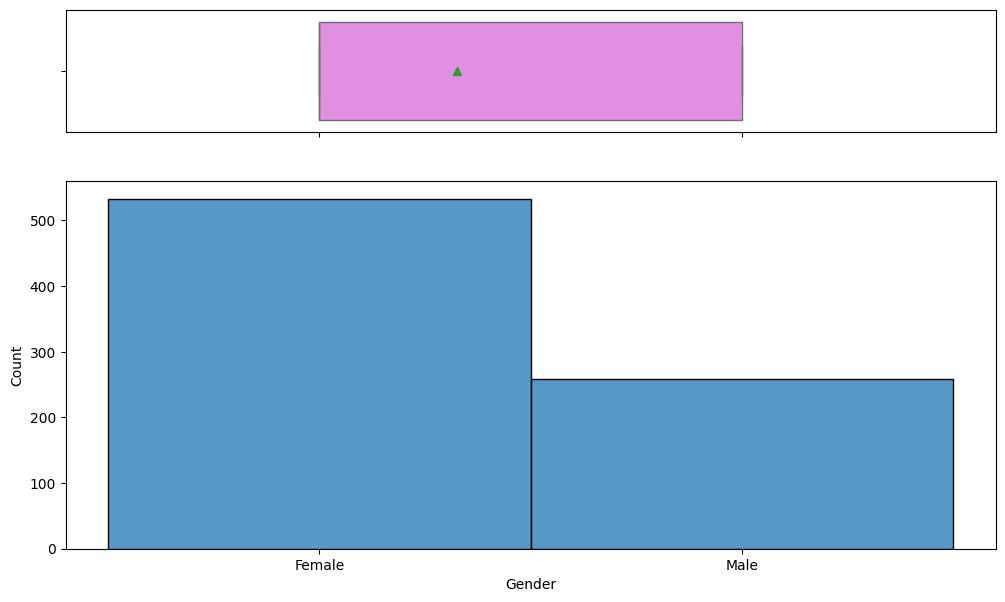

In [16]:
histogram_boxplot(data, "Gender")

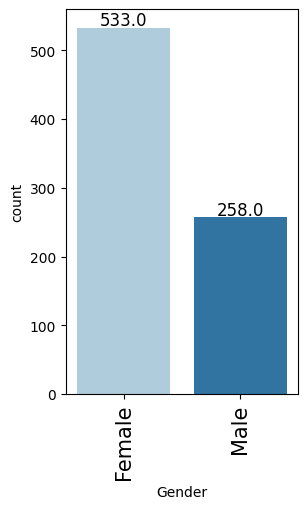

In [17]:
labeled_barplot(data, "Gender")

**Observation**

The are more female respondent than male

### Observations on Work Sector

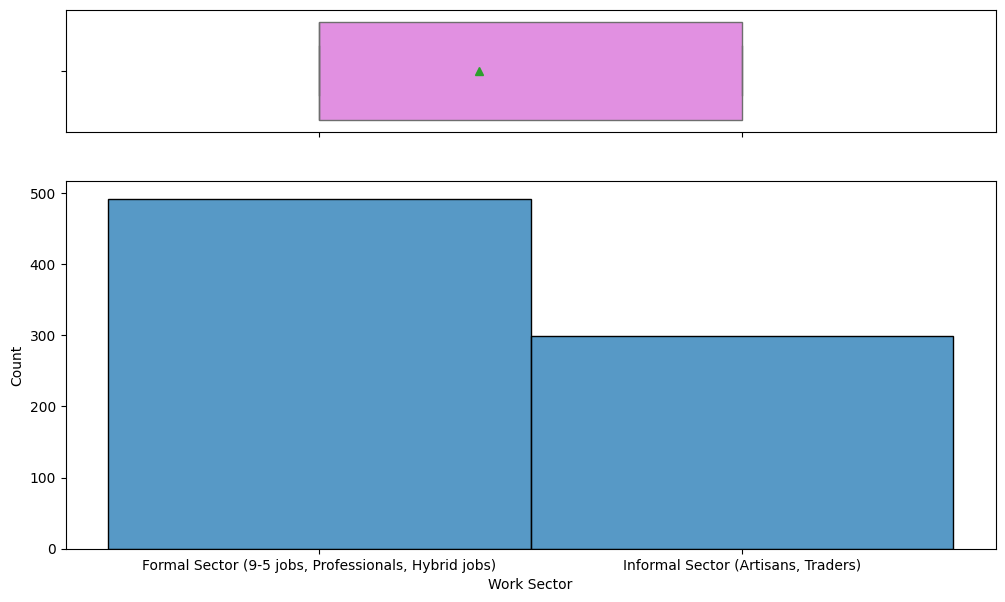

In [18]:
histogram_boxplot(data, "Work Sector")

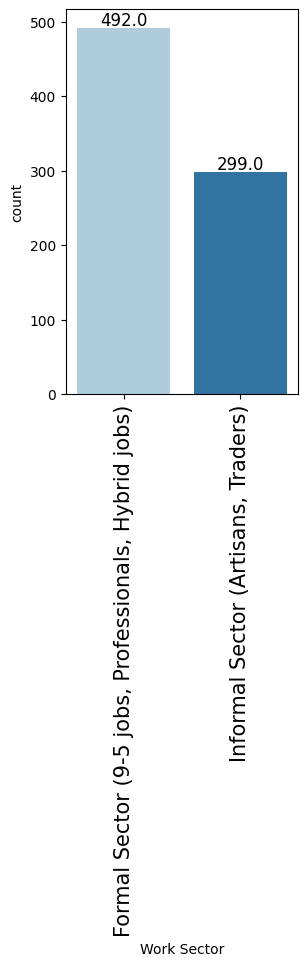

In [19]:
labeled_barplot(data, "Work Sector")

**Observation**
* Most of the respondent work in formal sector. That is the respondent is either works, 
    1. on a 9:00AM to 5:00Pm schedule or 
    2. as a professionals
    3. on jobs with hybrid mode 
* Few Informal sectors (such as Artisans and Traders) responded.

### Observations on Educational Qualification

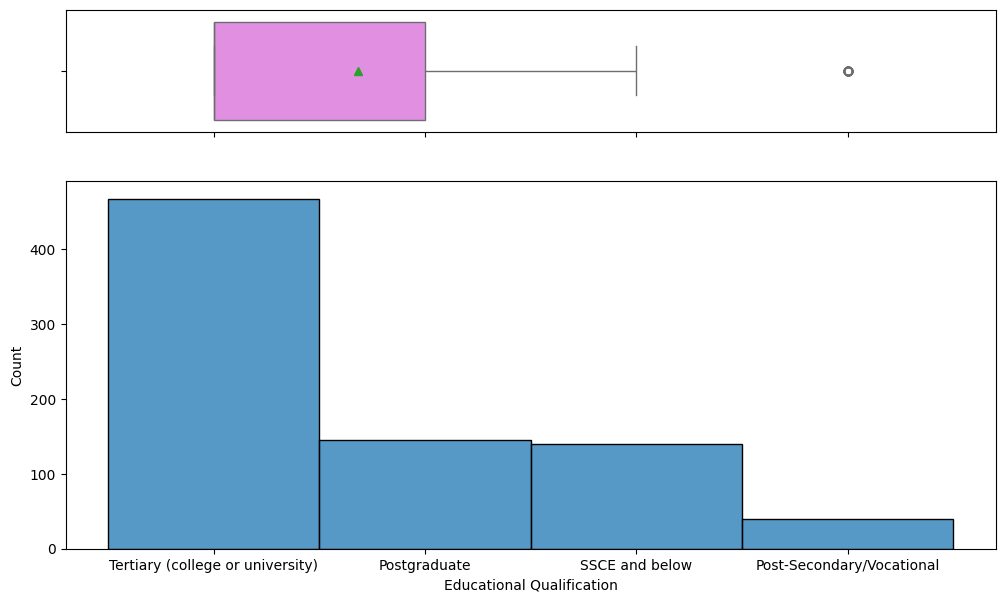

In [20]:
histogram_boxplot(data, "Educational Qualification")

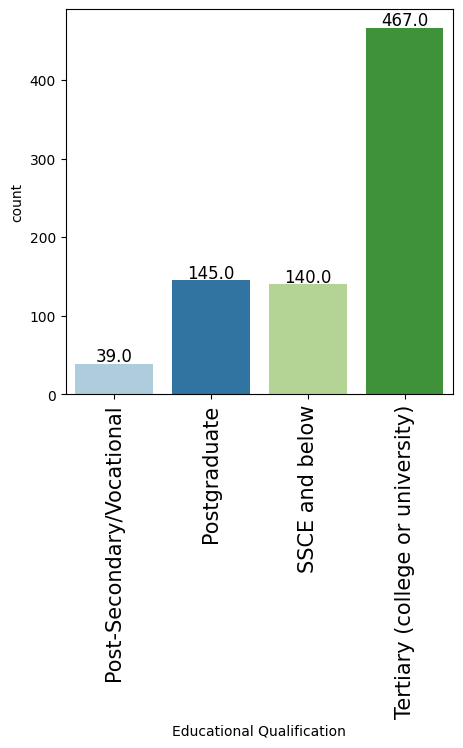

In [21]:
labeled_barplot(data, "Educational Qualification")

**Observation** 
* More than 400 respondent holds HND or BSC Degree.
* Less than 200 respondent hold postgraduate degree.
* The respondent with ND or NCE or MBBS in View or BTech or Undergraduate are all less than 100.

### Observations on Age Range

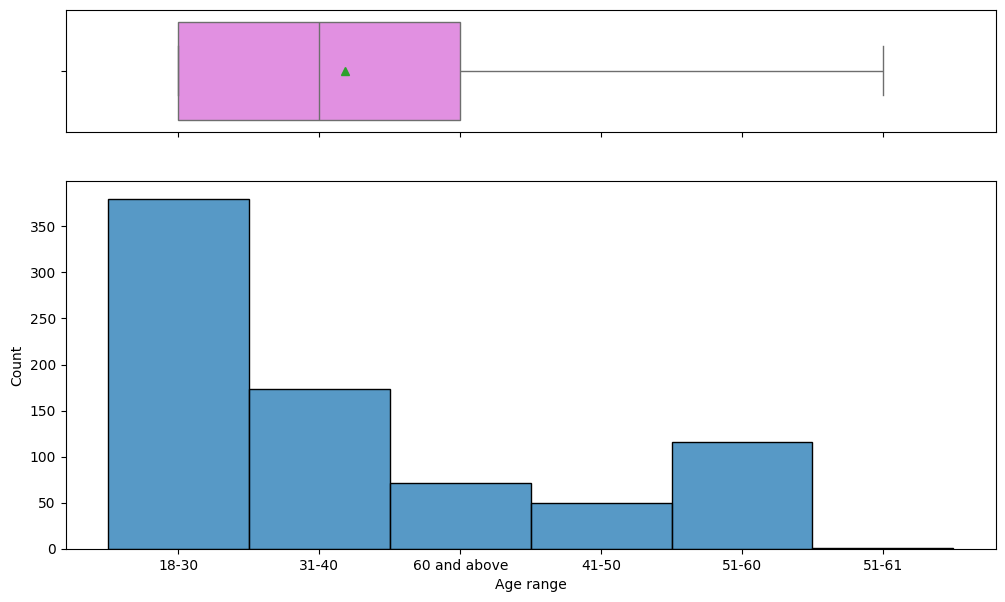

In [22]:
histogram_boxplot(data, "Age range")

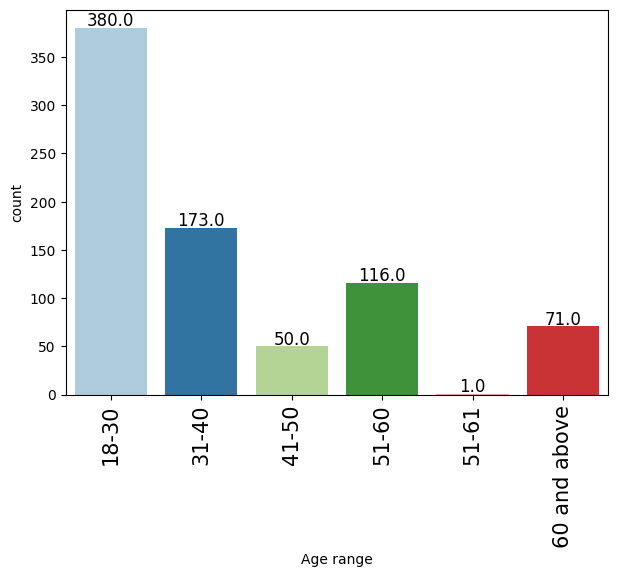

In [23]:
labeled_barplot(data, "Age range")

* 18-30 is the age range with the highest numebr of respondent follow by 31-40.
* 41-50 is the age range with the lowest number of respondent.

### Observations on 'Respondent with permanent voters card?'

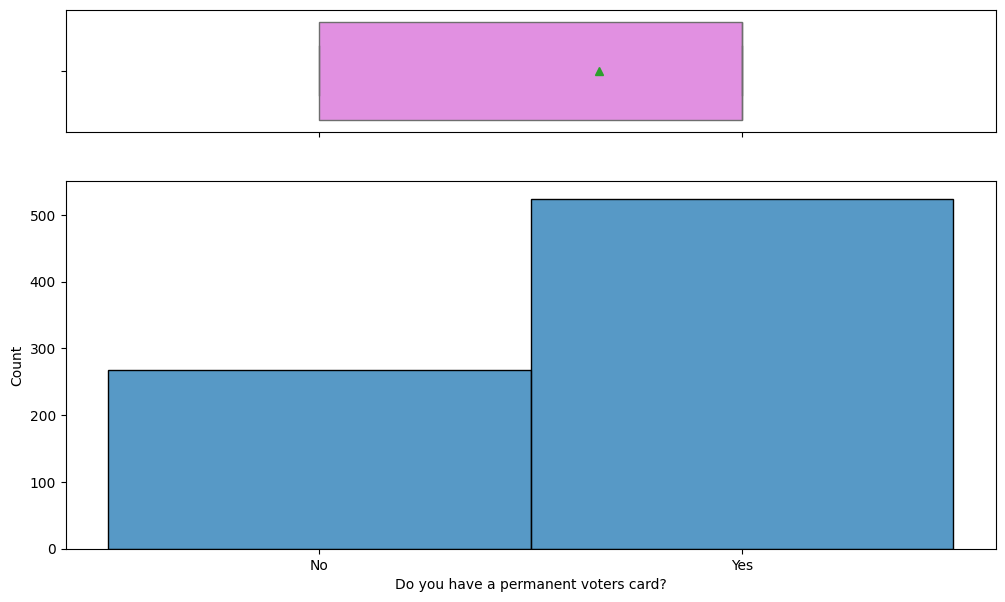

In [24]:
histogram_boxplot(data, "Do you have a permanent voters card?")

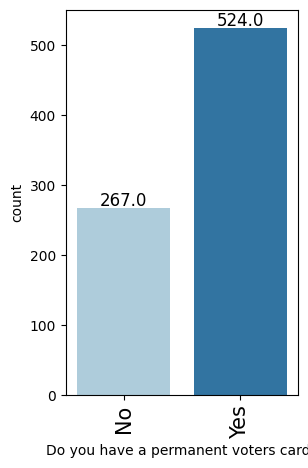

In [25]:
labeled_barplot(data, "Do you have a permanent voters card?")

**Observation**
* About 70% of the respondent have permanent voters card 

### Observations on <i>Respondent that are likely to vote when there is electoral violence around you</i>?

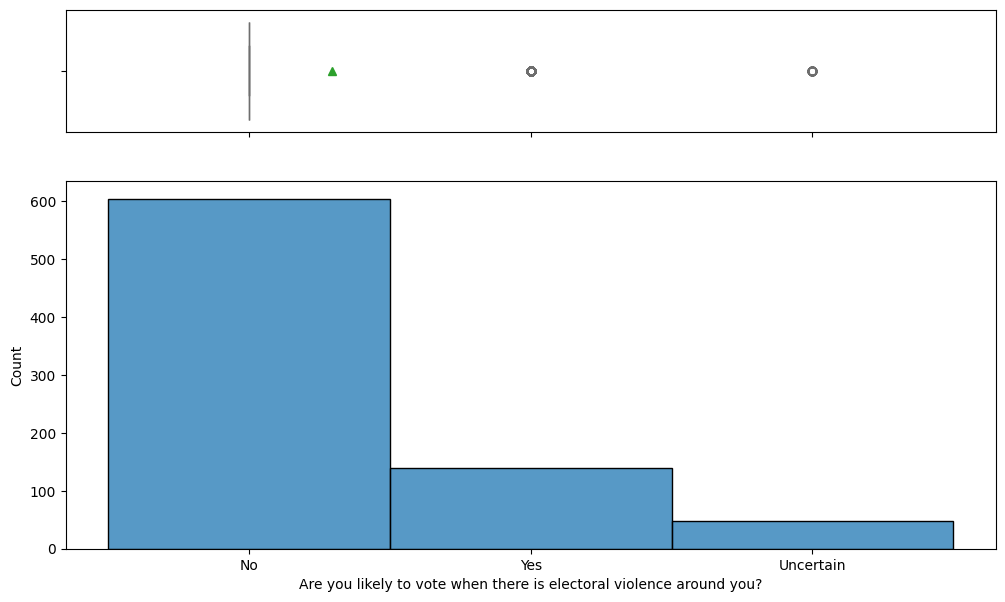

In [26]:
histogram_boxplot(data, "Are you likely to vote when there is electoral violence around you?")

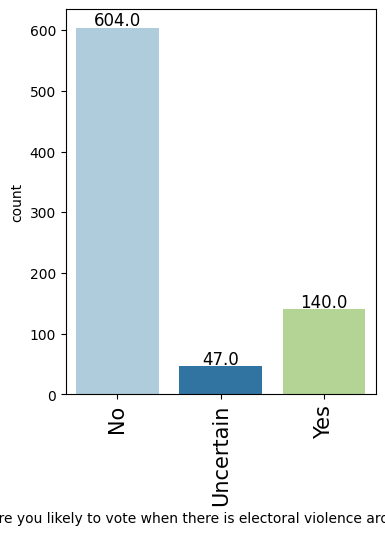

In [27]:
labeled_barplot(data, "Are you likely to vote when there is electoral violence around you?")

**Observation**
* around 80% of the respondent are not likely to vote when there is electoral violence around. 

### Observations on <i>Respondent that are likely to prevent a "female" loved one from going to vote after violence occurs</i>?

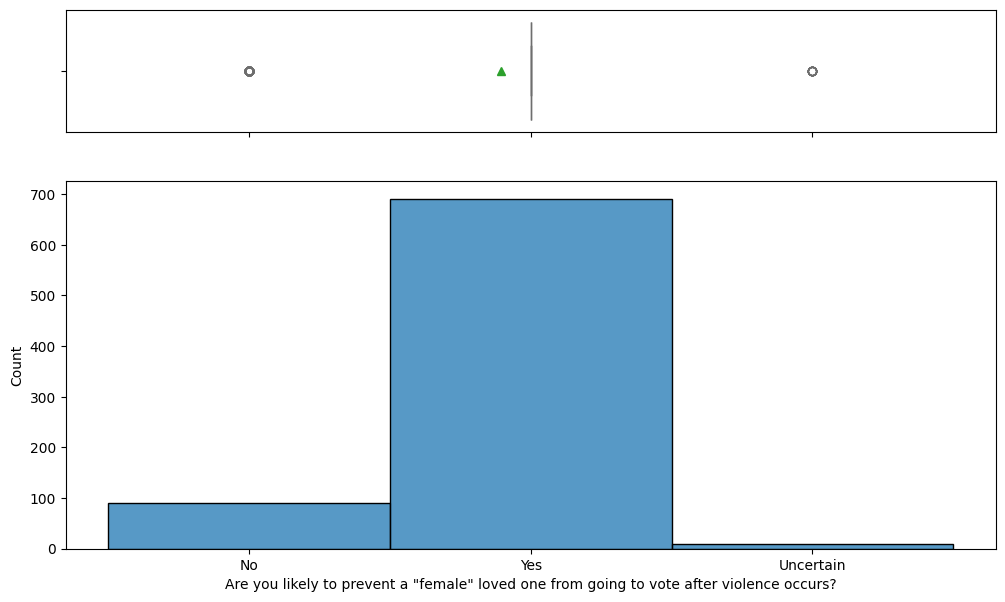

In [28]:
histogram_boxplot(data, 'Are you likely to prevent a "female" loved one from going to vote after violence occurs?')

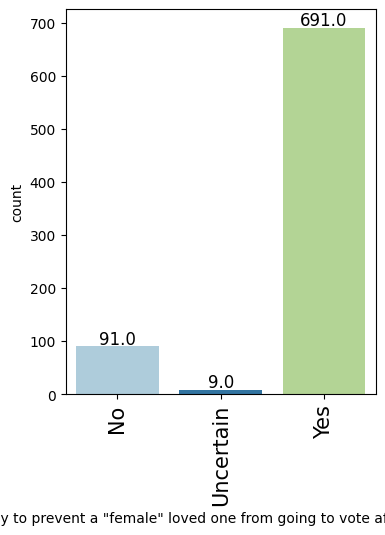

In [29]:
labeled_barplot(data, 'Are you likely to prevent a "female" loved one from going to vote after violence occurs?')

**Observation**
* 90% of the respondent indicate that they will prevent female loved ones from going to vote after violence occurs.

### Observations on Respondent that believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?

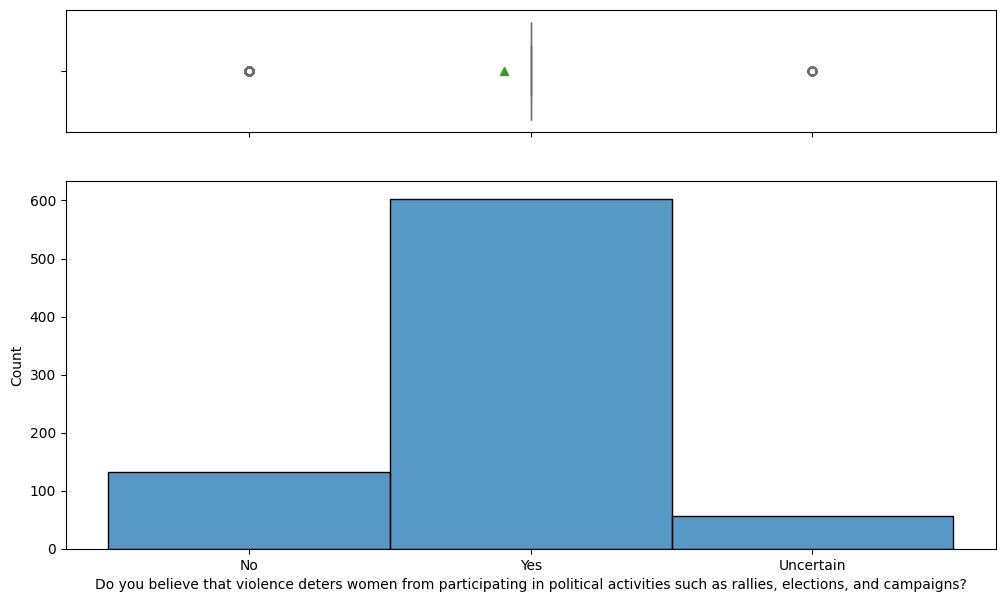

In [30]:
histogram_boxplot(data, "Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?")

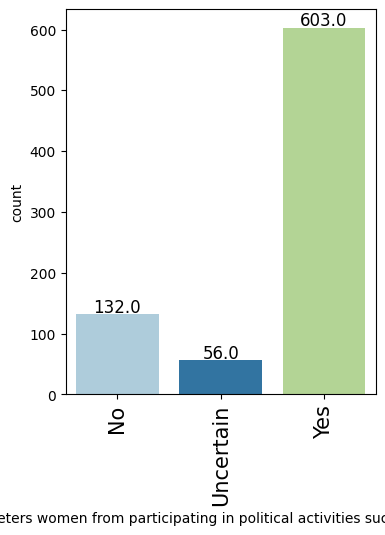

In [31]:
labeled_barplot(data, "Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?")

**Observation**
* Majority of the respondent believe that violenve deters women/female from participating in polical activities such as rallies, elections and campaigns

### Observations on Respondent who have the opinoin that violence impact the confidence of women in engaging in political activities?

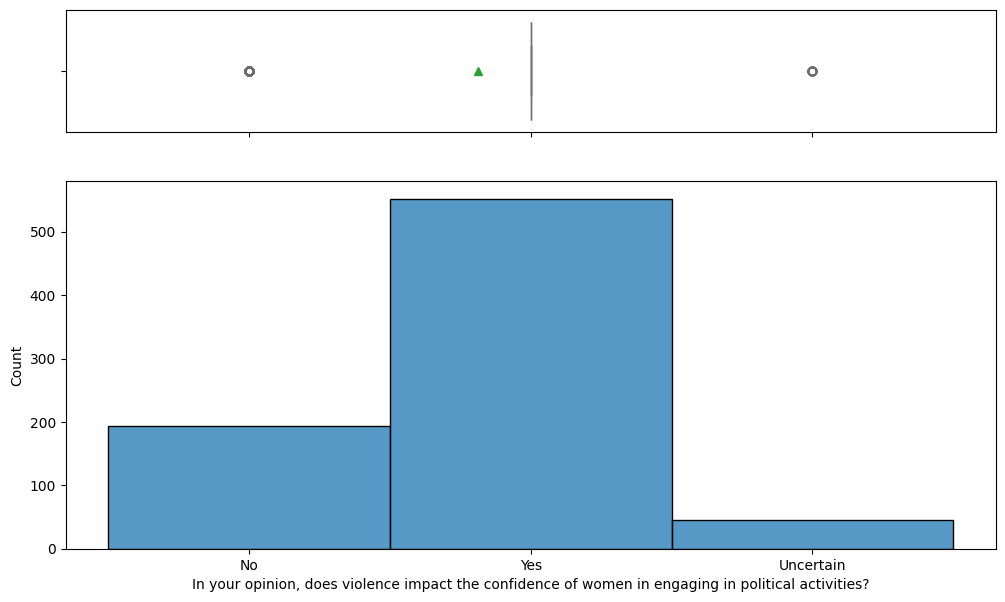

In [32]:
histogram_boxplot(data, "In your opinion, does violence impact the confidence of women in engaging in political activities?")

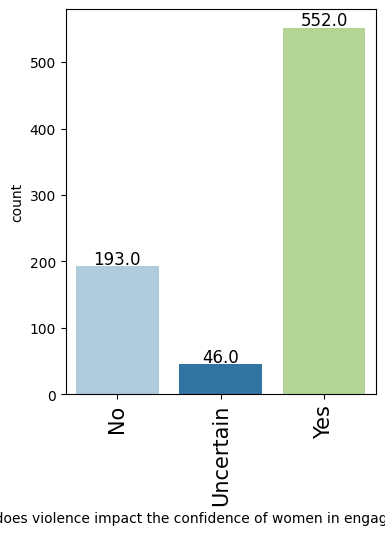

In [33]:
labeled_barplot(data, "In your opinion, does violence impact the confidence of women in engaging in political activities?")

**Observation**
* Majority of the respondent beleive violence impact the confidence of women in engaging in political activities

### Observations on Respondent that vote in 2023 General Elections?

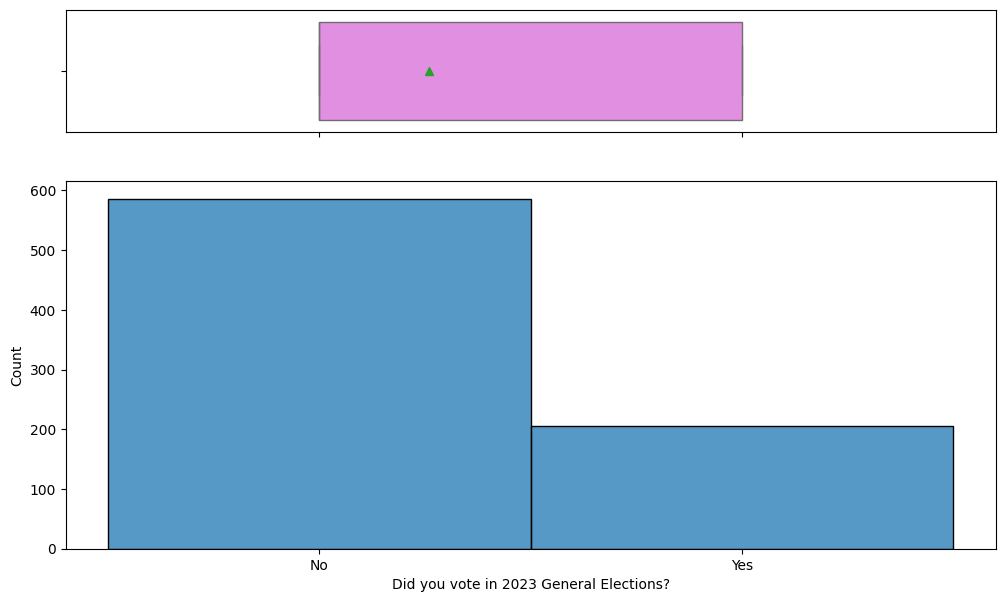

In [34]:
histogram_boxplot(data, "Did you vote in 2023 General Elections?")

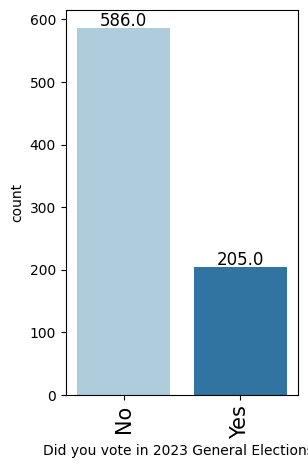

In [35]:
labeled_barplot(data, "Did you vote in 2023 General Elections?")

**Observation**
* Less that 300 respondent did not vote in 2023 General Election

### Observation on Why Some Respondent did Not Vote in 2023 general election

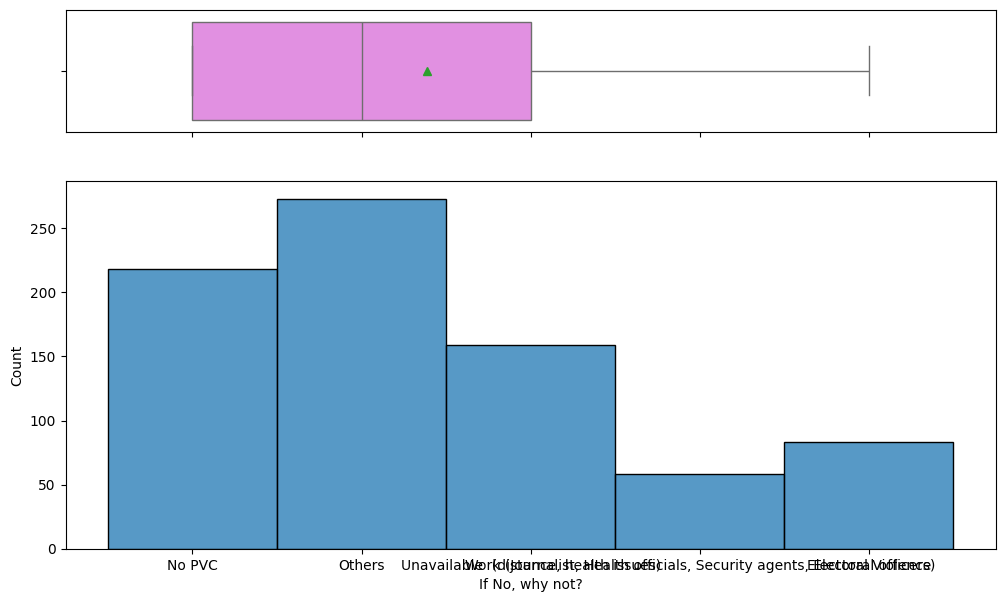

In [36]:
histogram_boxplot(data, "If No, why not?")

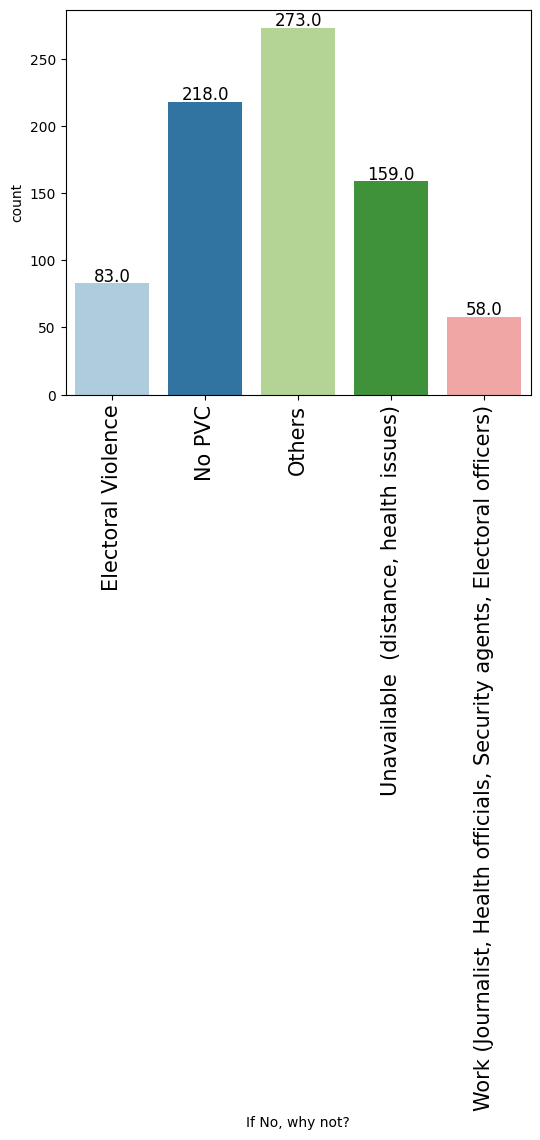

In [37]:
labeled_barplot(data, "If No, why not?")

**Observation**

* Majority of the respondent that did not vote are influenced by 
    1. Other reason best known to them
    2. Lack of Permanent Voters Card (PVC) and 
    3. Unavailability  (such as distance, health issues) 
* Less than 100 respondent did not vote due to Electoral Violence                                 
* Work (Journalist, Health officials, Security agents, Electoral officers) is reason for the least number of respondent that did not vote

### Observation on Respondent who has ever witnessed any form of electoral violence during elections?

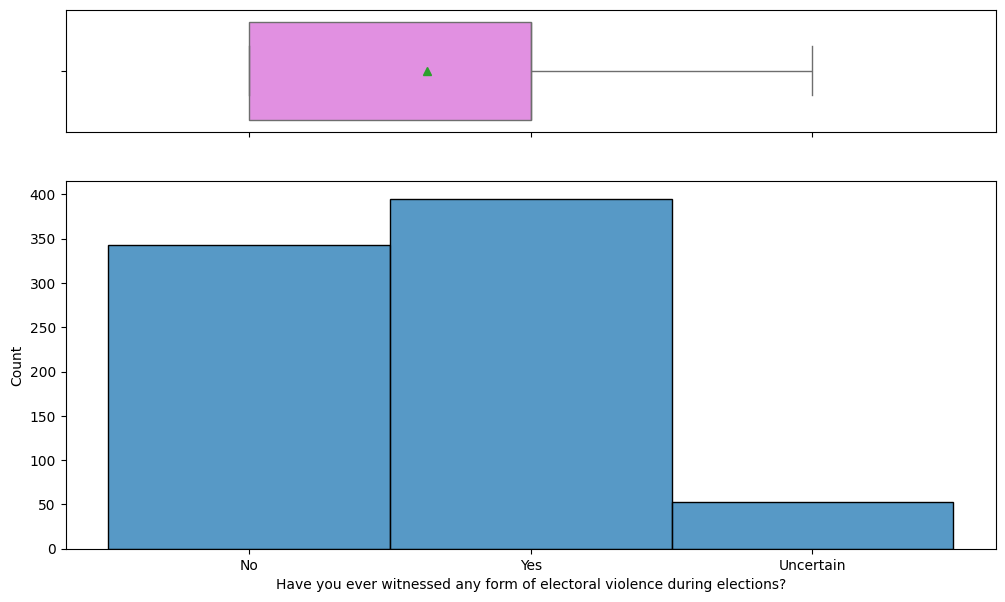

In [38]:
histogram_boxplot(data, "Have you ever witnessed any form of electoral violence during elections?")

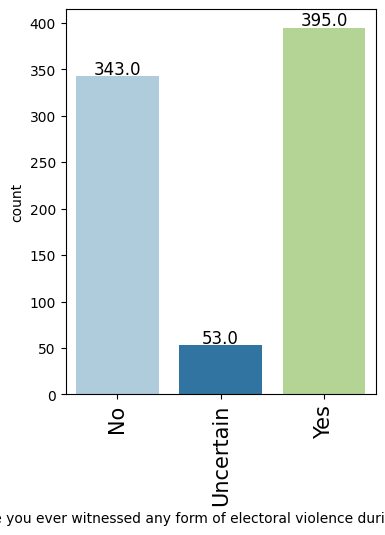

In [39]:
labeled_barplot(data, "Have you ever witnessed any form of electoral violence during elections?")

**Observation**
* Mjority od the respondent has witness at least a particular rform of electoral violence

### Observation on Respondent who has ever witnessed any form of harassment on social media?

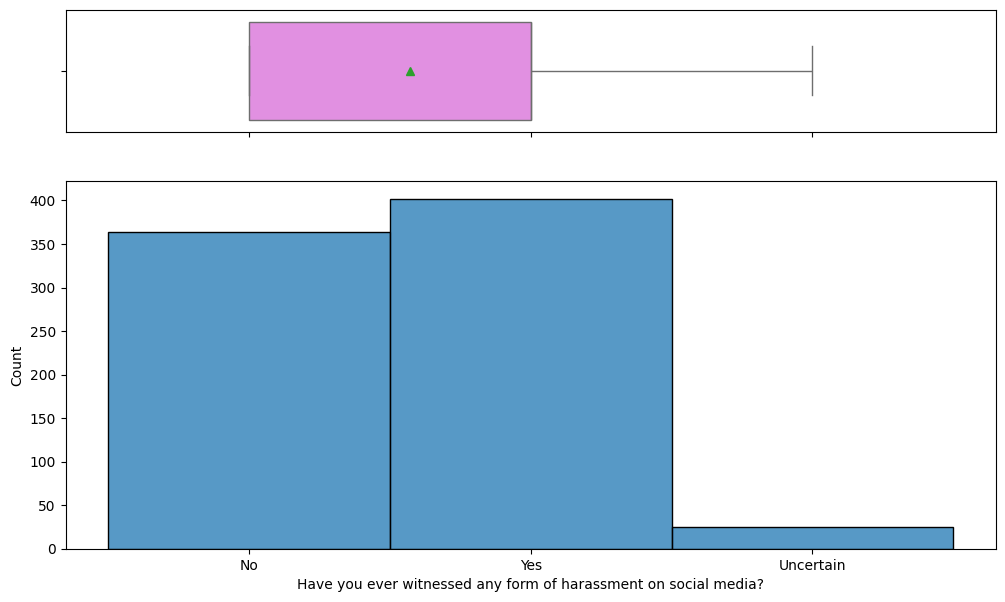

In [40]:
histogram_boxplot(data, "Have you ever witnessed any form of harassment on social media?")

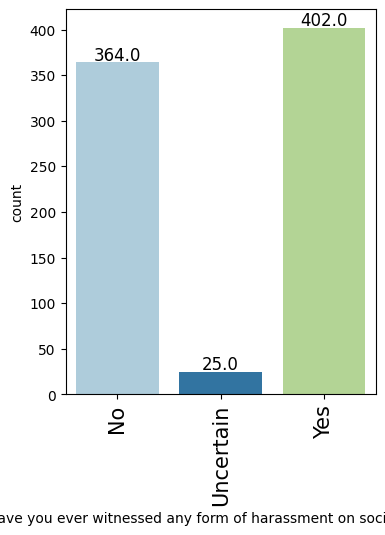

In [41]:
labeled_barplot(data, "Have you ever witnessed any form of harassment on social media?")

**Observation**

* Majority of the resondent has witnessed at least a particular form of harrasment on socia media 

## Bivariate Analysis

In [42]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)
    print("*" * 50)

Unique values in Gender are :
Female    533
Male      258
Name: Gender, dtype: int64
**************************************************
**************************************************
Unique values in Work Sector are :
Formal Sector (9-5 jobs, Professionals, Hybrid jobs)    492
Informal Sector (Artisans, Traders)                     299
Name: Work Sector, dtype: int64
**************************************************
**************************************************
Unique values in Educational Qualification are :
Tertiary (college or university)    467
Postgraduate                        145
SSCE and below                      140
Post-Secondary/Vocational            39
Name: Educational Qualification, dtype: int64
**************************************************
**************************************************
Unique values in Age range are :
18-30           380
31-40           173
51-60           116
60 and above     71
41-50            50
51-61             1
Name: Age rang

In [43]:
data.columns

Index(['Gender', 'Work Sector', 'Educational Qualification', 'Age range',
       'Do you have a permanent voters card?',
       'Are you likely to vote when there is electoral violence around you?',
       'Are you likely to prevent a "female" loved one from going to vote after violence occurs?',
       'Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?',
       'In your opinion, does violence impact the confidence of women in engaging in political activities?',
       'Did you vote in 2023 General Elections?', 'If No, why not?',
       'Have you ever witnessed any form of electoral violence during elections?',
       'Have you ever witnessed any form of harassment on social media?'],
      dtype='object')

In [44]:
## Encoding values of attributes into numerical value respectively, for analysis.

dataCorr = data.copy()

dataCorr["Gender"].replace("Male", 1, inplace=True)
dataCorr["Gender"].replace("Female", 0, inplace=True)

dataCorr["Work Sector"].replace("Formal Sector (9-5 jobs, Professionals, Hybrid jobs)", 1, inplace=True)
dataCorr["Work Sector"].replace("Informal Sector (Artisans, Traders)", 0, inplace=True)

dataCorr["Do you have a permanent voters card?"].replace("Yes", 1, inplace=True)
dataCorr["Do you have a permanent voters card?"].replace("No", 0, inplace=True)

dataCorr["Did you vote in 2023 General Elections?"].replace("Yes", 1, inplace=True)
dataCorr["Did you vote in 2023 General Elections?"].replace("No", 0, inplace=True)

dataCorr["Educational Qualification"].replace("Postgraduate", 20, inplace=True)
dataCorr["Educational Qualification"].replace("Tertiary (college or university)", 15, inplace=True)
dataCorr["Educational Qualification"].replace("Post-Secondary/Vocational", 10, inplace=True)
dataCorr["Educational Qualification"].replace("SSCE and below", 5, inplace=True)
dataCorr["Educational Qualification"].astype('float64')

dataCorr["Age range"].replace("18-30", 24, inplace=True)
dataCorr["Age range"].replace("31-40", 35.5, inplace=True)
dataCorr["Age range"].replace("51-60", 55.5, inplace=True)
dataCorr["Age range"].replace("41-50", 45.5, inplace=True)
dataCorr["Age range"].replace("51-61", 56, inplace=True)
dataCorr["Age range"].replace("60 and above", 80, inplace=True)
dataCorr["Age range"].astype('float64')

dataCorr["Are you likely to vote when there is electoral violence around you?"].replace("No", 0, inplace=True)
dataCorr["Are you likely to vote when there is electoral violence around you?"].replace("Yes", 1, inplace=True)
dataCorr["Are you likely to vote when there is electoral violence around you?"].replace("Uncertain", 0.5, inplace=True)
dataCorr["Are you likely to vote when there is electoral violence around you?"].astype('float64')

dataCorr['Are you likely to prevent a "female" loved one from going to vote after violence occurs?'].replace("No", 0, inplace=True)
dataCorr['Are you likely to prevent a "female" loved one from going to vote after violence occurs?'].replace("Yes", 1, inplace=True)
dataCorr['Are you likely to prevent a "female" loved one from going to vote after violence occurs?'].replace("Uncertain", 0.5, inplace=True)
dataCorr['Are you likely to prevent a "female" loved one from going to vote after violence occurs?'].astype('float64')

dataCorr["Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?"].replace("No", 0, inplace=True)
dataCorr["Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?"].replace("Yes", 1, inplace=True)
dataCorr["Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?"].replace("Uncertain", 0.5, inplace=True)
dataCorr["Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?"].astype('float64')

dataCorr["If No, why not?"].replace("Others", 0.3, inplace=True)
dataCorr["If No, why not?"].replace("No PVC", 0, inplace=True)
dataCorr["If No, why not?"].replace("Unavailable  (distance, health issues)", 0.5, inplace=True)
dataCorr["If No, why not?"].replace("Electoral Violence", 1, inplace=True)
dataCorr["If No, why not?"].replace("Work (Journalist, Health officials, Security agents, Electoral officers)", 0.5, inplace=True)
dataCorr["If No, why not?"].astype('float64')

dataCorr["Have you ever witnessed any form of electoral violence during elections?"].replace("Yes", 1, inplace=True)
dataCorr["Have you ever witnessed any form of electoral violence during elections?"].replace("No", 0, inplace=True)
dataCorr["Have you ever witnessed any form of electoral violence during elections?"].replace("Uncertain", 0.5, inplace=True)
dataCorr["Have you ever witnessed any form of electoral violence during elections?"].astype('float64')

dataCorr["Have you ever witnessed any form of harassment on social media?"].replace("Yes", 1, inplace=True)
dataCorr["Have you ever witnessed any form of harassment on social media?"].replace("No", 0, inplace=True)
dataCorr["Have you ever witnessed any form of harassment on social media?"].replace("Uncertain", 0.5, inplace=True)
dataCorr["Have you ever witnessed any form of harassment on social media?"].astype('float64')

dataCorr["In your opinion, does violence impact the confidence of women in engaging in political activities?"].replace("Yes", 1, inplace=True)
dataCorr["In your opinion, does violence impact the confidence of women in engaging in political activities?"].replace("No", 0, inplace=True)
dataCorr["In your opinion, does violence impact the confidence of women in engaging in political activities?"].replace("Uncertain", 0.5, inplace=True)
dataCorr["In your opinion, does violence impact the confidence of women in engaging in political activities?"].astype('float64')

0      0.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
786    1.0
787    0.0
788    1.0
789    0.5
790    1.0
Name: In your opinion, does violence impact the confidence of women in engaging in political activities?, Length: 791, dtype: float64

In [45]:
dataCorr.rename(columns = {'Educational Qualification':'Edu. Qlf.'}, inplace = True)
dataCorr.rename(columns = {'Do you have a permanent voters card?':'PVC'}, inplace = True)
dataCorr.rename(columns = {'Did you vote in 2023 General Elections?':'Vote in 2023 Gen. Elec.'}, inplace = True)
dataCorr.rename(columns = {'Are you likely to vote when there is electoral violence around you?':'Vote During Elec. Vio.'}, inplace = True)
dataCorr.rename(columns = {'Are you likely to prevent a "female" loved one from going to vote after violence occurs?':'Allow Female Vote During Elec. Vio.'}, inplace = True)
dataCorr.rename(columns = {'Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?':'Violence Deters Women From Parti.'}, inplace = True)
dataCorr.rename(columns = {'In your opinion, does violence impact the confidence of women in engaging in political activities?':'Violence Impact Women Confi. In Parti.'}, inplace = True)
dataCorr.rename(columns = {'Have you ever witnessed any form of electoral violence during elections?':'Witnessed any Elec. Vio.'}, inplace = True)
dataCorr.rename(columns = {'Have you ever witnessed any form of harassment on social media?':'Witnessed Haras. Social Media'}, inplace = True)

dataCorr.columns

Index(['Gender', 'Work Sector', 'Edu. Qlf.', 'Age range', 'PVC',
       'Vote During Elec. Vio.', 'Allow Female Vote During Elec. Vio.',
       'Violence Deters Women From Parti.',
       'Violence Impact Women Confi. In Parti.', 'Vote in 2023 Gen. Elec.',
       'If No, why not?', 'Witnessed any Elec. Vio.',
       'Witnessed Haras. Social Media'],
      dtype='object')

In [46]:
dataCorr.corr(method='pearson', min_periods=0, numeric_only = True)

Gender  Work Sector  Edu. Qlf.  \
Gender                                  1.000000     0.041848  -0.006414   
Work Sector                             0.041848     1.000000   0.381546   
Edu. Qlf.                              -0.006414     0.381546   1.000000   
Age range                              -0.011497    -0.009647   0.022666   
PVC                                    -0.016611     0.044513   0.046042   
Vote During Elec. Vio.                  0.004688     0.056062  -0.005317   
Allow Female Vote During Elec. Vio.    -0.036502    -0.021084   0.004132   
Violence Deters Women From Parti.       0.015561     0.092999   0.062870   
Violence Impact Women Confi. In Parti. -0.022303     0.026451   0.104492   
Vote in 2023 Gen. Elec.                 0.025450     0.062421   0.009453   
If No, why not?                         0.008553    -0.040700   0.115801   
Witnessed any Elec. Vio.                0.078462     0.053180   0.057553   
Witnessed Haras. Social Media           0.040072     0.040755   0.052234   

                                        Age range       PVC  \
Gender                                  -0.011497 -0.016611   
Work Sector                             -0.009647  0.044513   
Edu. Qlf.                                0.022666  0.046042   
Age range                                1.000000  0.103473   
PVC                                      0.103473  1.000000   
Vote During Elec. Vio.                   0.017472  0.087849   
Allow Female Vote During Elec. Vio.      0.007416  0.006357   
Violence Deters Women From Parti.        0.033838  0.162179   
Violence Impact Women Confi. In Parti.   0.010143  0.162623   
Vote in 2023 Gen. Elec.                  0.090162  0.422200   
If No, why not?                          0.009245  0.338936   
Witnessed any Elec. Vio.                 0.029101  0.043147   
Witnessed Haras. Social Media           -0.034038  0.053929   

                                        Vote During Elec. Vio.  \
Gender                                                0.004688   
Work Sector                                           0.056062   
Edu. Qlf.                                            -0.005317   
Age range                                             0.017472   
PVC                                                   0.087849   
Vote During Elec. Vio.                                1.000000   
Allow Female Vote During Elec. Vio.                  -0.150338   
Violence Deters Women From Parti.                    -0.085752   
Violence Impact Women Confi. In Parti.                0.163322   
Vote in 2023 Gen. Elec.                               0.322217   
If No, why not?                                       0.103107   
Witnessed any Elec. Vio.                              0.080689   
Witnessed Haras. Social Media                        -0.014504   

                                        Allow Female Vote During Elec. Vio.  \
Gender                                                            -0.036502   
Work Sector                                                       -0.021084   
Edu. Qlf.                                                          0.004132   
Age range                                                          0.007416   
PVC                                                                0.006357   
Vote During Elec. Vio.                                            -0.150338   
Allow Female Vote During Elec. Vio.                                1.000000   
Violence Deters Women From Parti.                                  0.385850   
Violence Impact Women Confi. In Parti.                             0.265218   
Vote in 2023 Gen. Elec.                                           -0.078540   
If No, why not?                                                    0.103252   
Witnessed any Elec. Vio.                                           0.170516   
Witnessed Haras. Social Media                                      0.168421   

                                        Violence Deters Women 

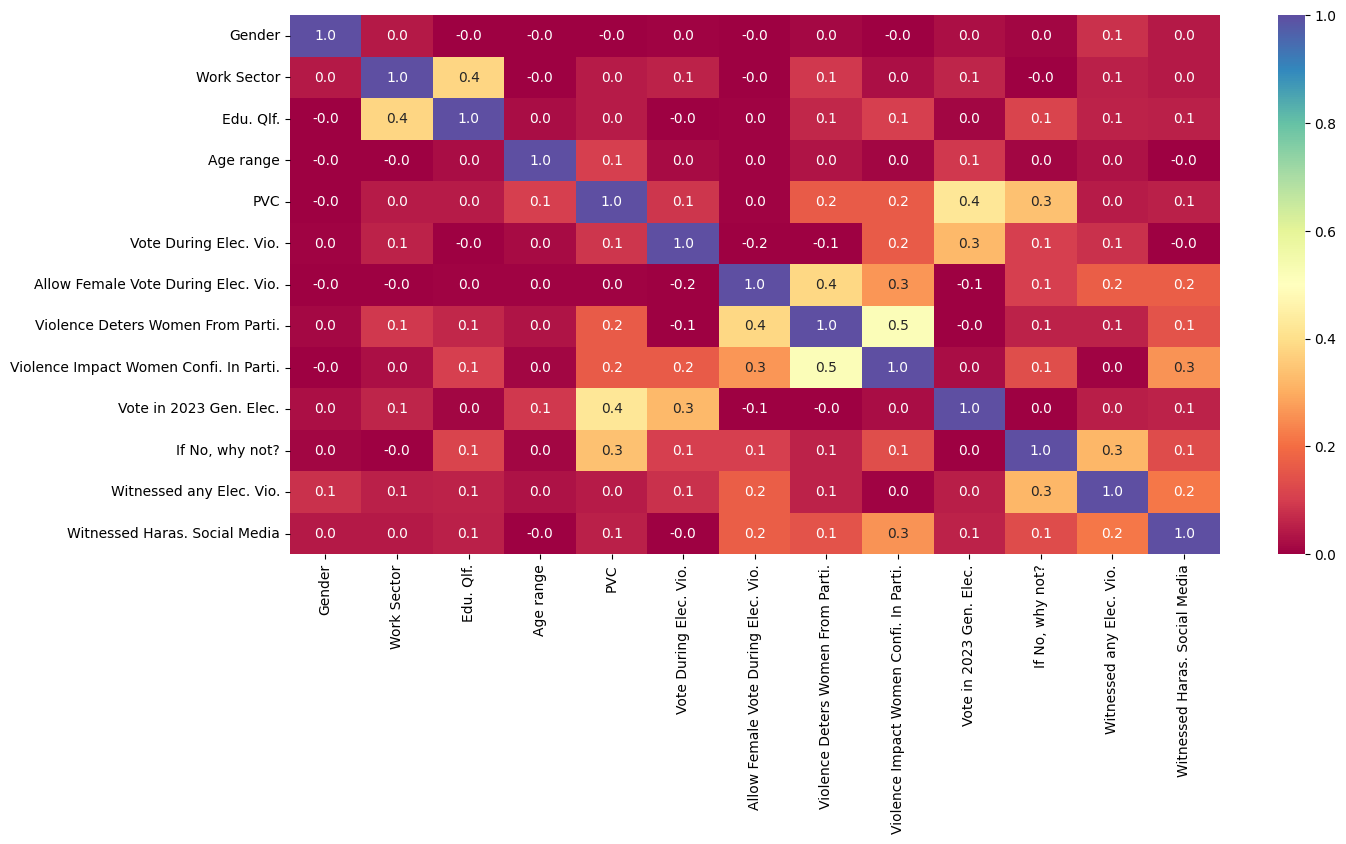

In [47]:
plt.figure(figsize=(15, 7))
sns.heatmap(dataCorr.corr(method='pearson'), annot=True, vmin=-0, vmax=1, fmt=".1f", cmap="Spectral")
plt.show()

**Observation**
* The education qualification is well correlated to the work sector of the respondent
* vote is 2023 election is well correlated with have a PVC and vote during election violence but slightly correlated to having witnessed harrassment on social media
* violence deter women from participating in electoral activitives is higly correlated to allowing femal to vote during electoral violence
* witnessing any form of electoral violence is also correlated to Why repondent do not vote in teh 2023 general election ("if No, why Not")
* Gender shows a slight correlation with 'witnessed any Electoral Violence' 

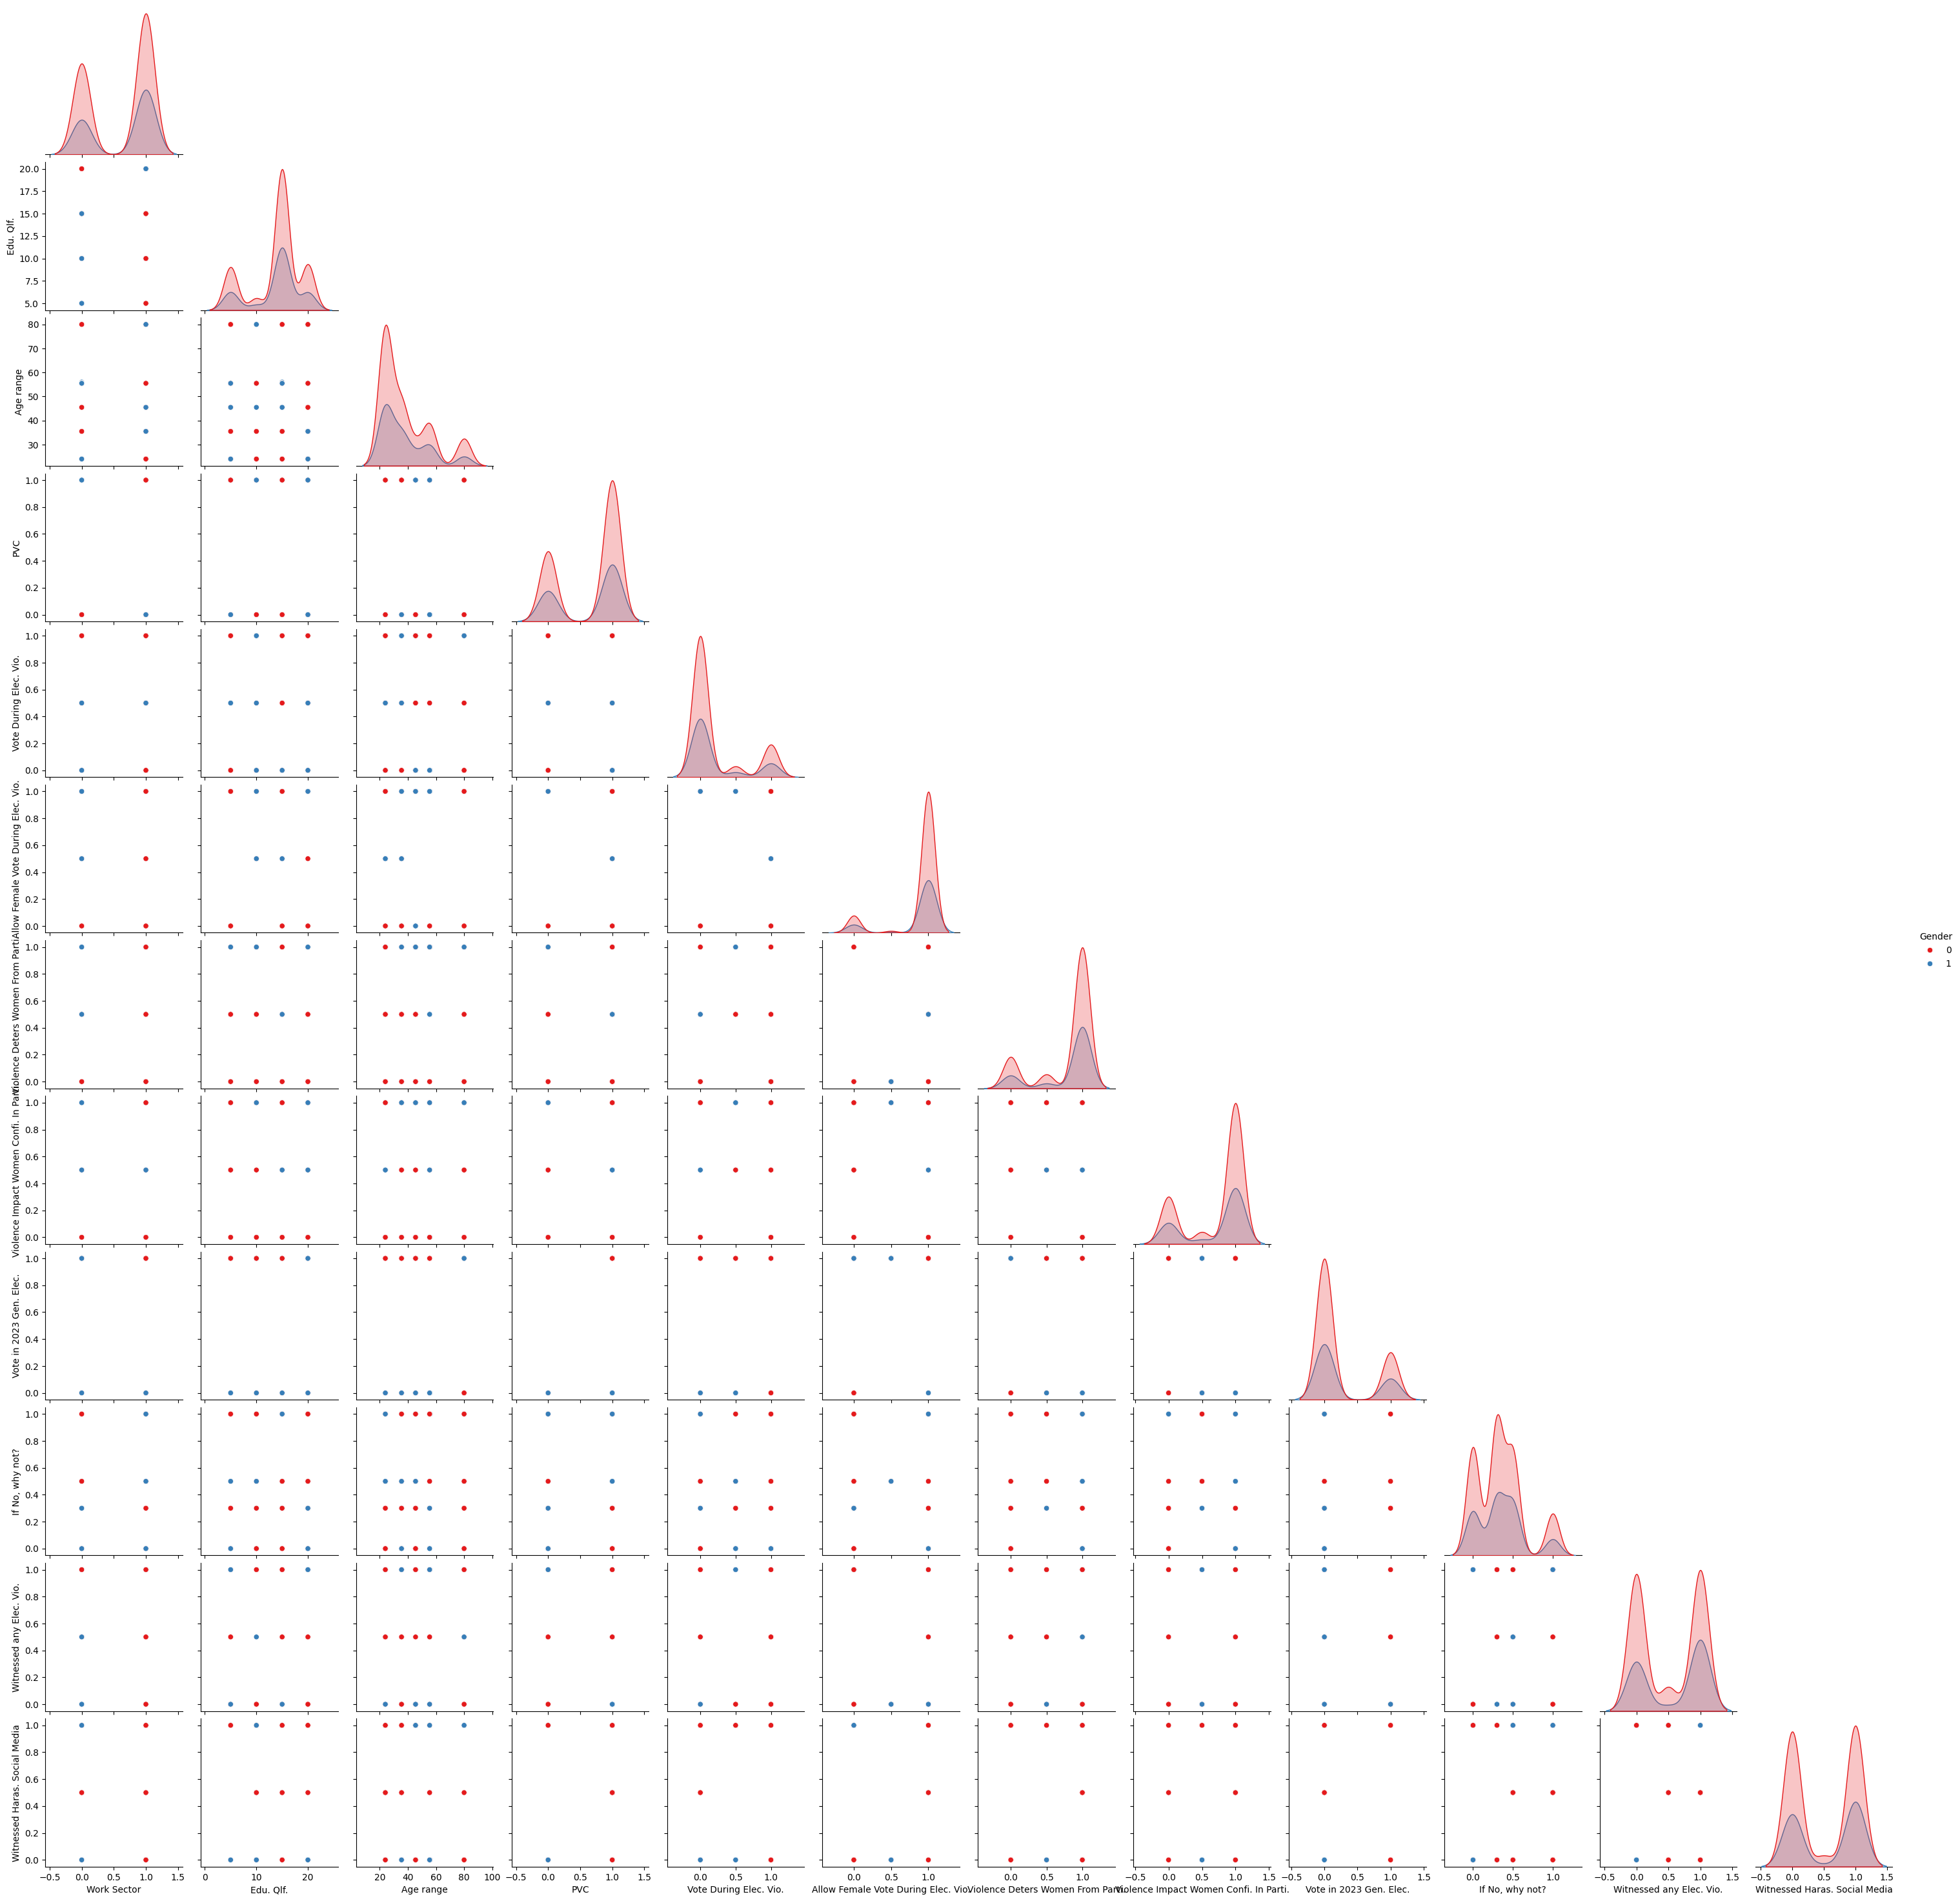

In [48]:
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(dataCorr, hue="Gender",corner=True)
# plot_kws={'line_kws':{'color':'red'}}

plt.show()

In [49]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 9, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Gender vs Did you vote in 2023 General Elections?

Did you vote in 2023 General Elections?   No  Yes  All
Gender                                                
All                                      586  205  791
Female                                   399  134  533
Male                                     187   71  258
------------------------------------------------------------------------------------------------------------------------


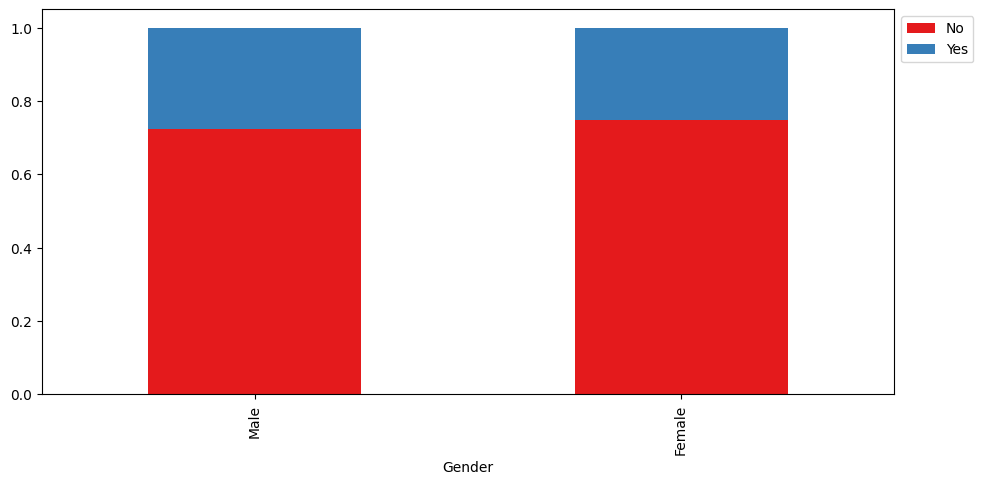

In [50]:
stacked_barplot(data, "Gender", "Did you vote in 2023 General Elections?")

### Gender vs Do you have a permanent voters card?

Do you have a permanent voters card?   No  Yes  All
Gender                                             
All                                   267  524  791
Female                                177  356  533
Male                                   90  168  258
------------------------------------------------------------------------------------------------------------------------


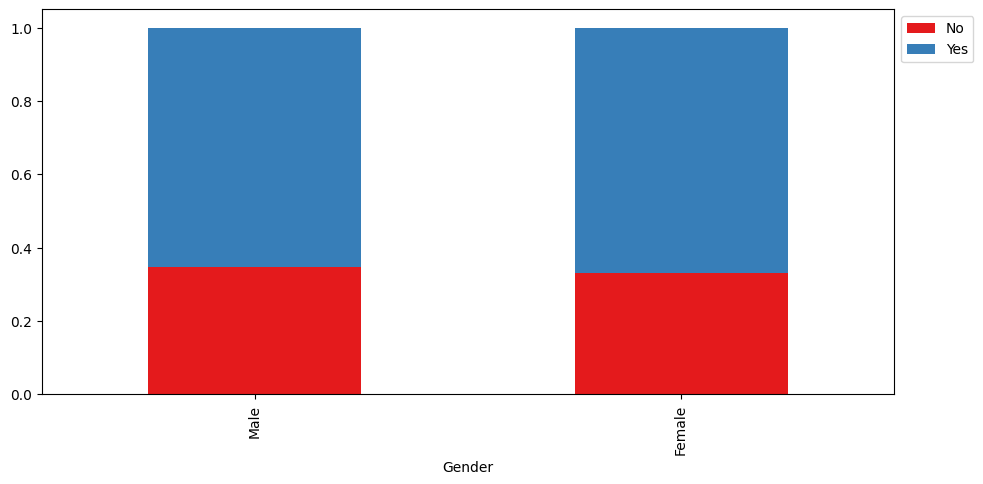

In [51]:
stacked_barplot(data, "Gender", "Do you have a permanent voters card?")

### Gender vs Are you likely to vote when there is electoral violence around you?

Gender                                              Female  Male  All
Are you likely to vote when there is electoral ...                   
All                                                    533   258  791
No                                                     408   196  604
Yes                                                     94    46  140
Uncertain                                               31    16   47
------------------------------------------------------------------------------------------------------------------------


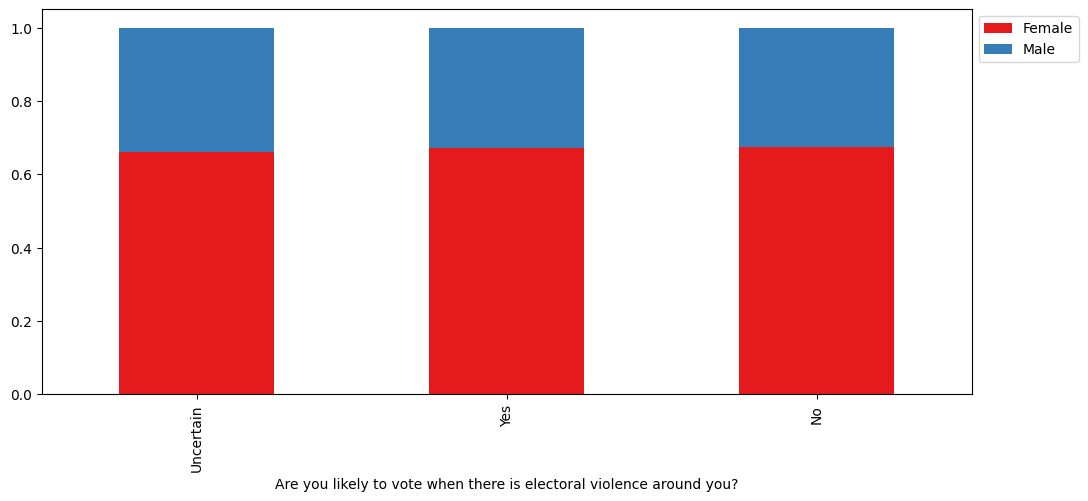

In [52]:
stacked_barplot(data, "Are you likely to vote when there is electoral violence around you?", "Gender")

### Gender vs  Are you likely to prevent a "female" loved one from going to vote after violence occurs?

Gender                                              Female  Male  All
Are you likely to prevent a "female" loved one ...                   
All                                                    533   258  791
Yes                                                    470   221  691
No                                                      57    34   91
Uncertain                                                6     3    9
------------------------------------------------------------------------------------------------------------------------


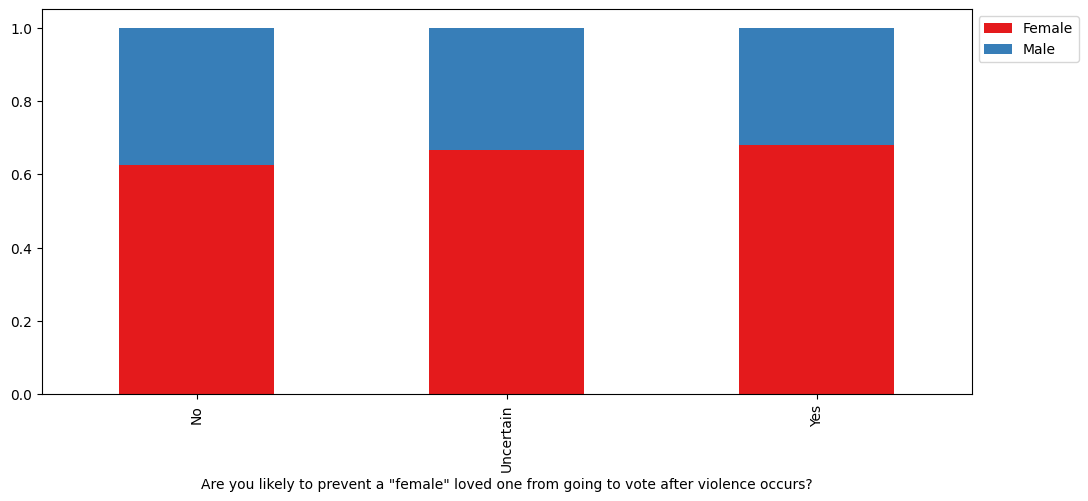

In [53]:
stacked_barplot(data, 'Are you likely to prevent a "female" loved one from going to vote after violence occurs?', "Gender")

* The customers from two extreme income groups - Earning less than 40K and Earning more than 120k+ are the ones attriting the most.

### Gender vs Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?

Gender                                              Female  Male  All
Do you believe that violence deters women from ...                   
All                                                    533   258  791
Yes                                                    403   200  603
No                                                      90    42  132
Uncertain                                               40    16   56
------------------------------------------------------------------------------------------------------------------------


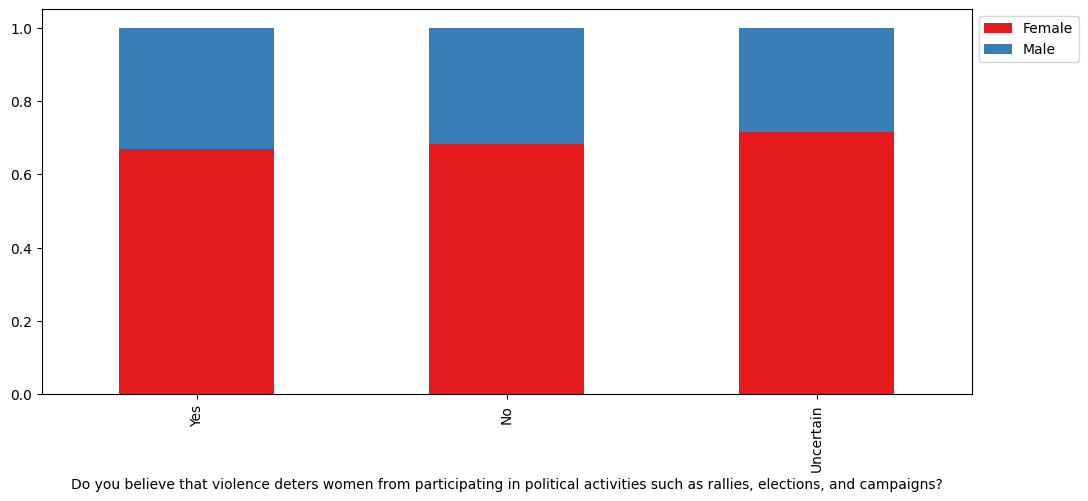

In [54]:
stacked_barplot(data, "Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?", "Gender")

### Gender vs In your opinion, does violence impact the confidence of women in engaging in political activities?

Gender                                              Female  Male  All
In your opinion, does violence impact the confi...                   
All                                                    533   258  791
Yes                                                    375   177  552
No                                                     126    67  193
Uncertain                                               32    14   46
------------------------------------------------------------------------------------------------------------------------


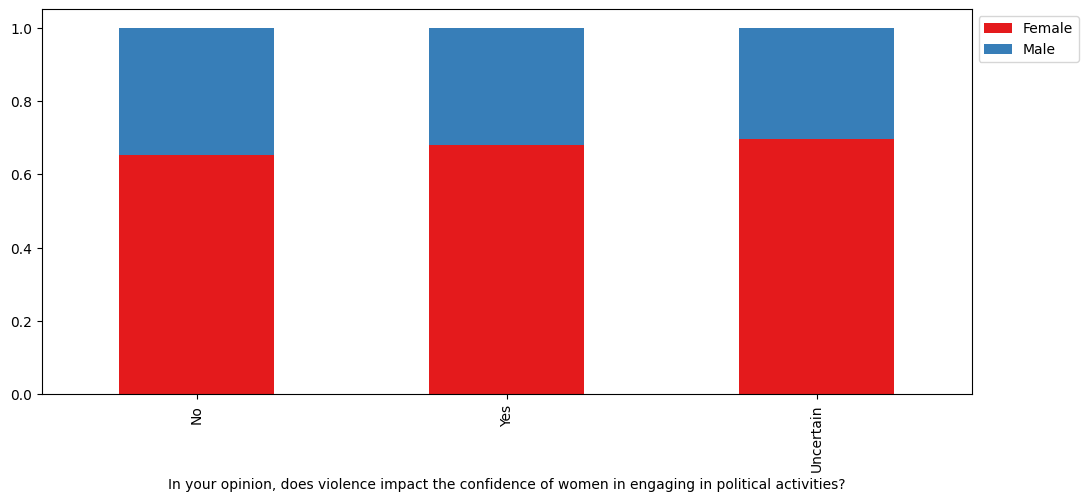

In [55]:
stacked_barplot(data, "In your opinion, does violence impact the confidence of women in engaging in political activities?", "Gender")

### Gender vs If No, why not?

Gender                                              Female  Male  All
If No, why not?                                                      
All                                                    533   258  791
Others                                                 186    87  273
No PVC                                                 150    68  218
Unavailable  (distance, health issues)                 103    56  159
Electoral Violence                                      58    25   83
Work (Journalist, Health officials, Security ag...      36    22   58
------------------------------------------------------------------------------------------------------------------------


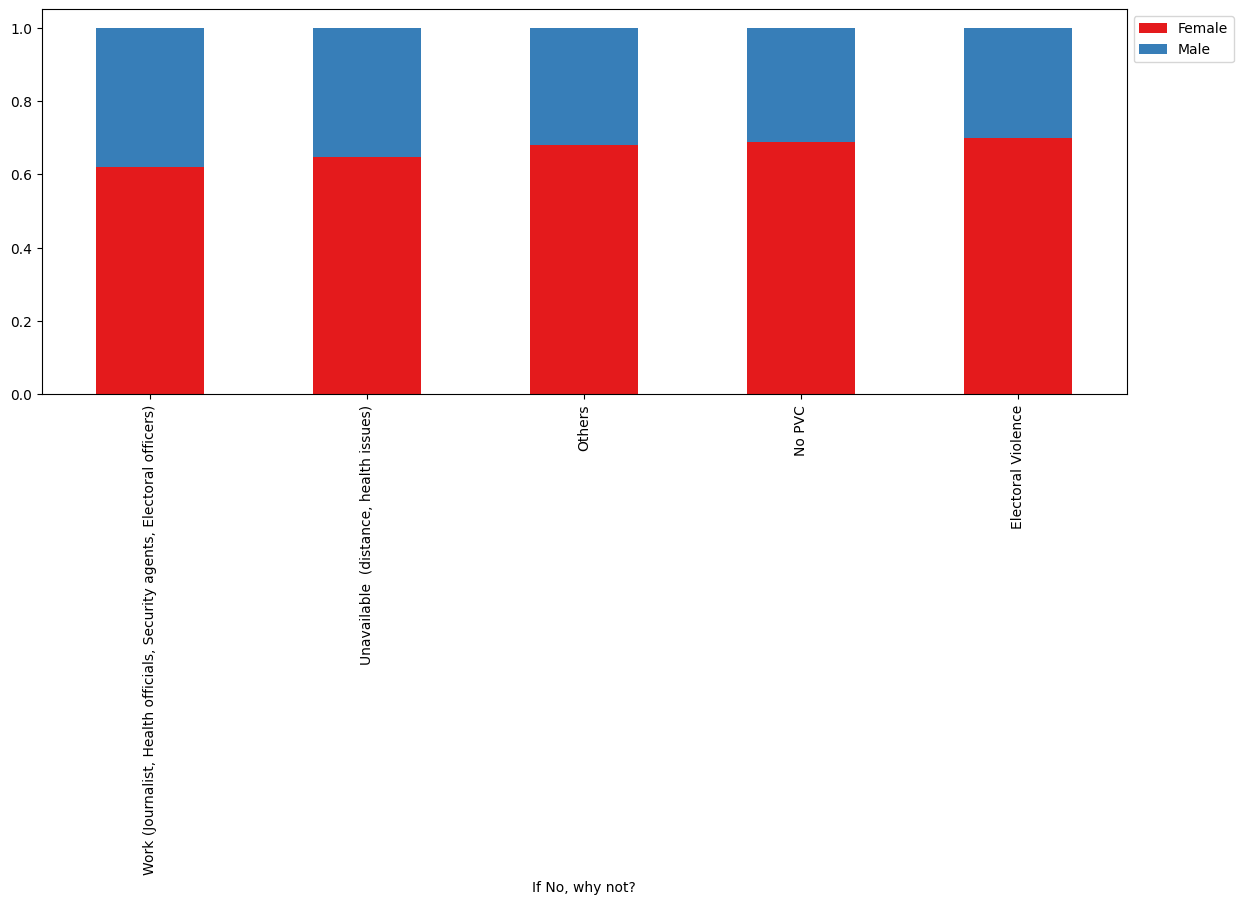

In [56]:
stacked_barplot(data, "If No, why not?", "Gender")

### Gender vs Have you ever witnessed any form of electoral violence during elections?

Gender                                              Female  Male  All
Have you ever witnessed any form of electoral v...                   
All                                                    533   258  791
Yes                                                    249   146  395
No                                                     242   101  343
Uncertain                                               42    11   53
------------------------------------------------------------------------------------------------------------------------


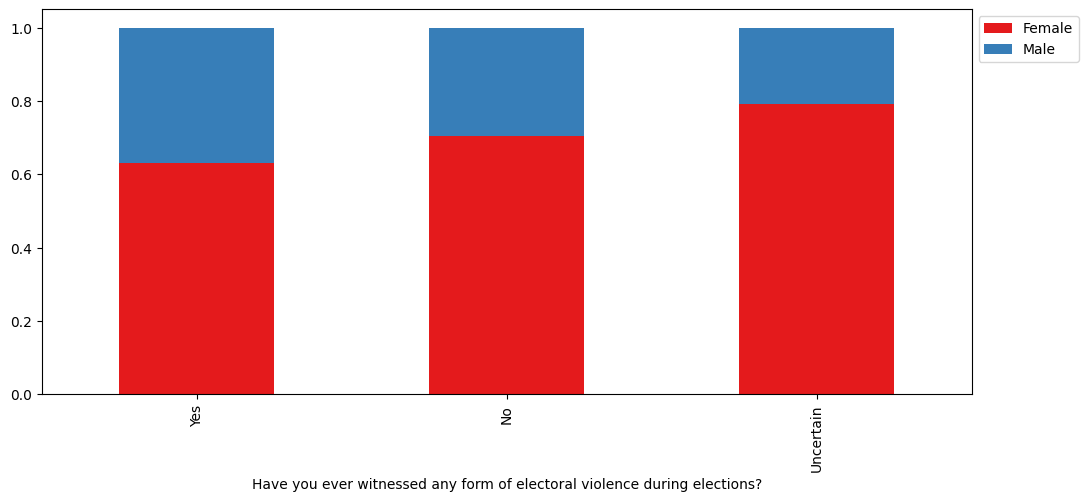

In [57]:
stacked_barplot(data, "Have you ever witnessed any form of electoral violence during elections?", "Gender")

### Gender vs Have you ever witnessed any form of harassment on social media?

Gender                                              Female  Male  All
Have you ever witnessed any form of harassment ...                   
All                                                    533   258  791
Yes                                                    262   140  402
No                                                     251   113  364
Uncertain                                               20     5   25
------------------------------------------------------------------------------------------------------------------------


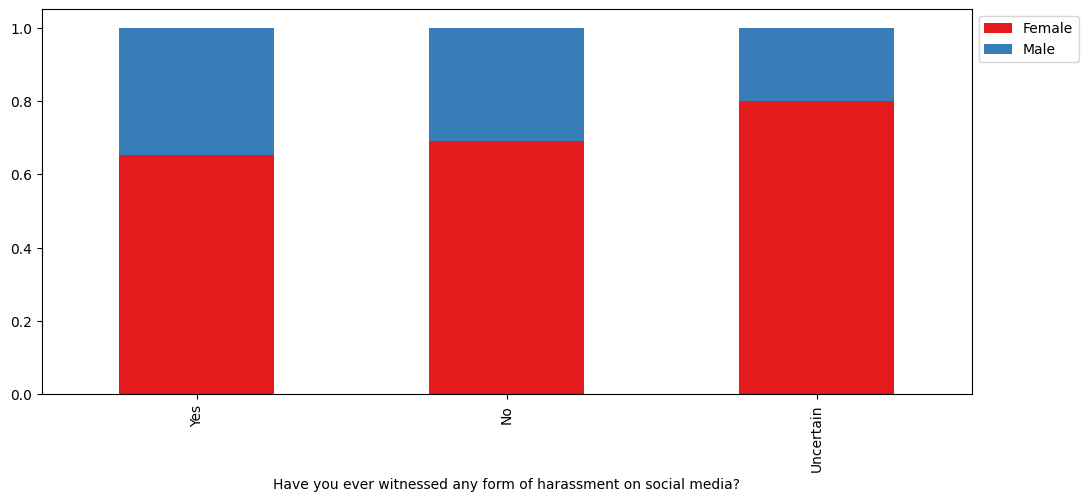

In [58]:
stacked_barplot(data, "Have you ever witnessed any form of harassment on social media?", "Gender")

Gender                            Female  Male  All
Educational Qualification                          
All                                  533   258  791
Tertiary (college or university)     311   156  467
SSCE and below                        95    45  140
Postgraduate                         101    44  145
Post-Secondary/Vocational             26    13   39
------------------------------------------------------------------------------------------------------------------------


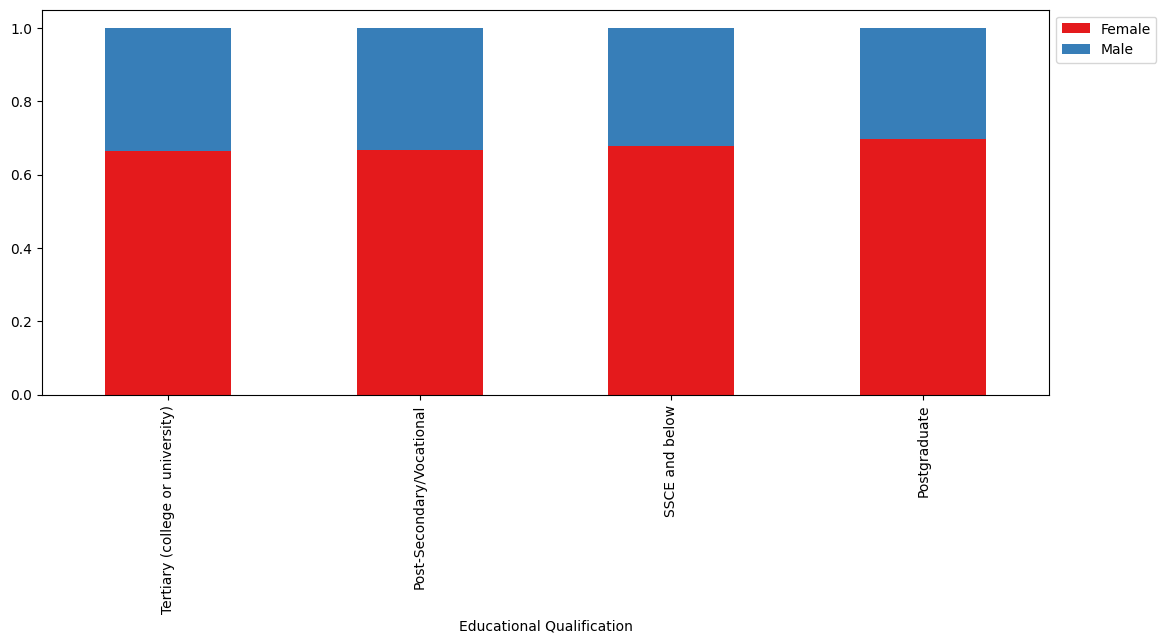

In [59]:
stacked_barplot(data, "Educational Qualification", "Gender")

### Gender vs Age range

Gender        Female  Male  All
Age range                      
All              533   258  791
18-30            261   119  380
31-40            111    62  173
51-60             77    39  116
60 and above      52    19   71
41-50             32    18   50
51-61              0     1    1
------------------------------------------------------------------------------------------------------------------------


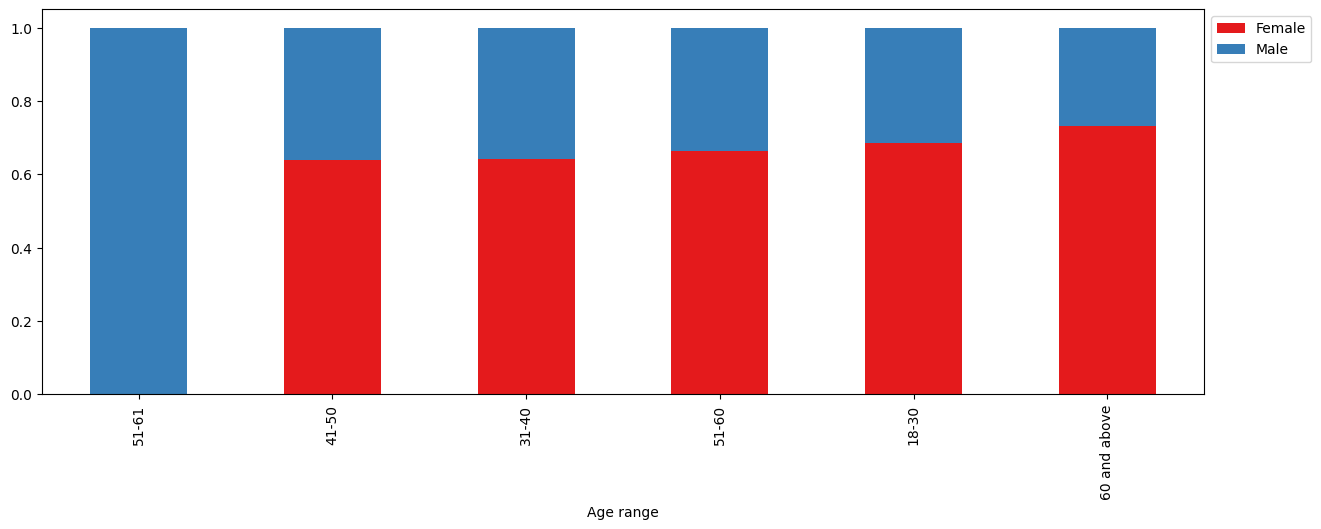

In [60]:
stacked_barplot(data, "Age range", "Gender")

In [61]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Gender vs Age range

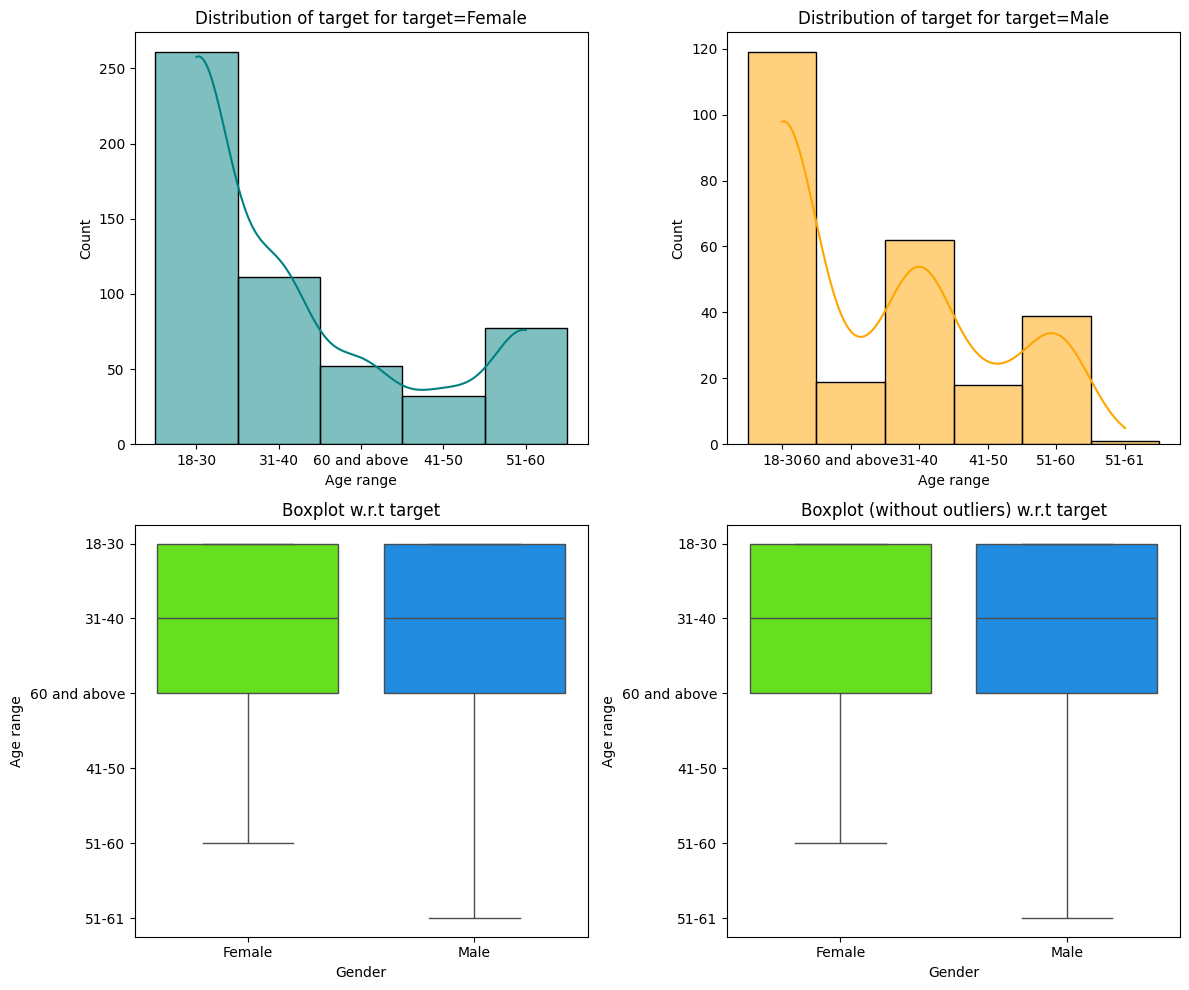

In [62]:
distribution_plot_wrt_target(data, "Age range", "Gender")

### Gender vs Work Sector

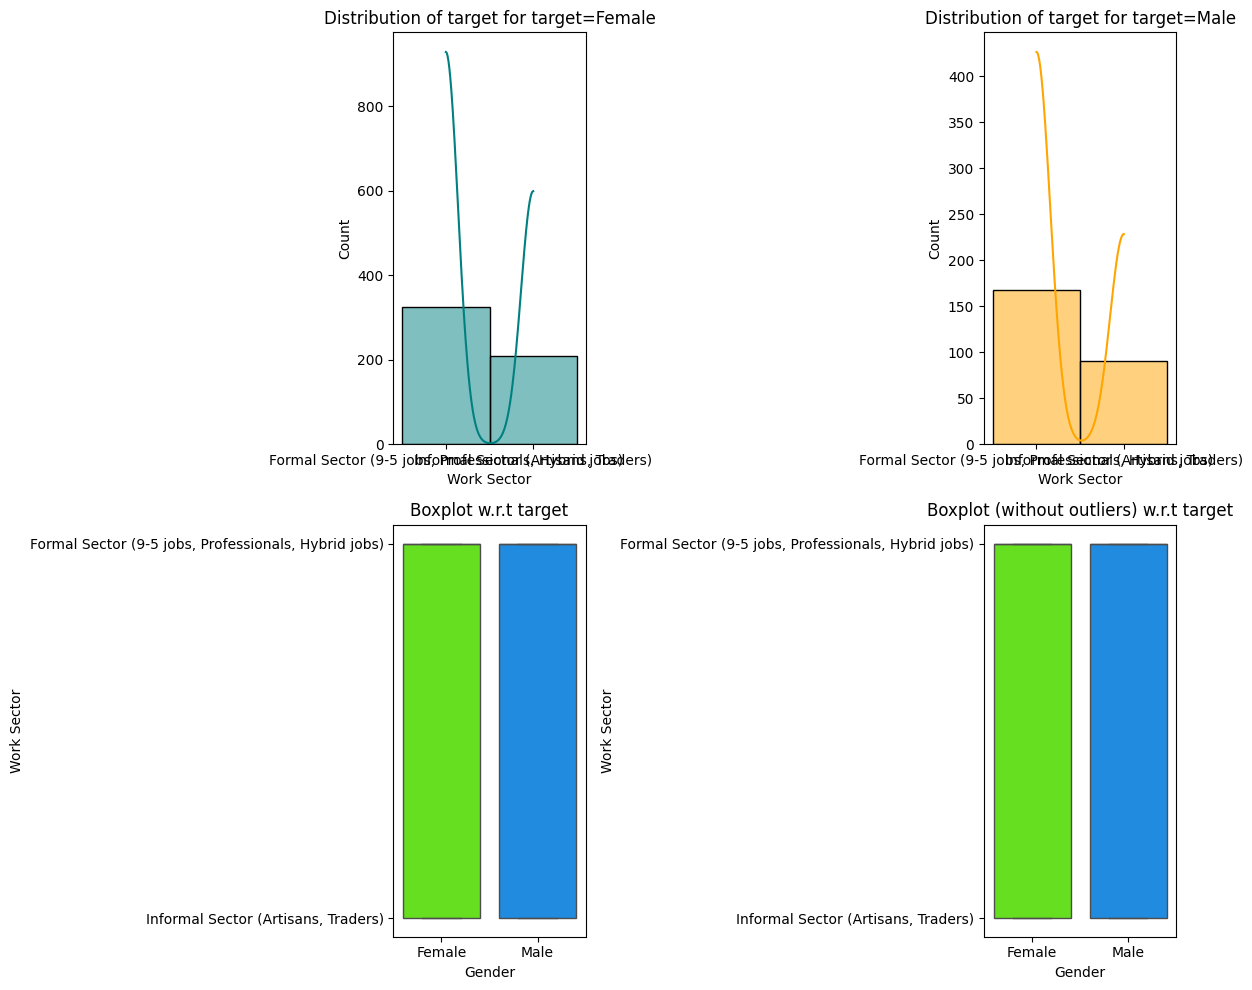

In [63]:
distribution_plot_wrt_target(data, "Work Sector", "Gender")

### Gender vs Educational Qualification

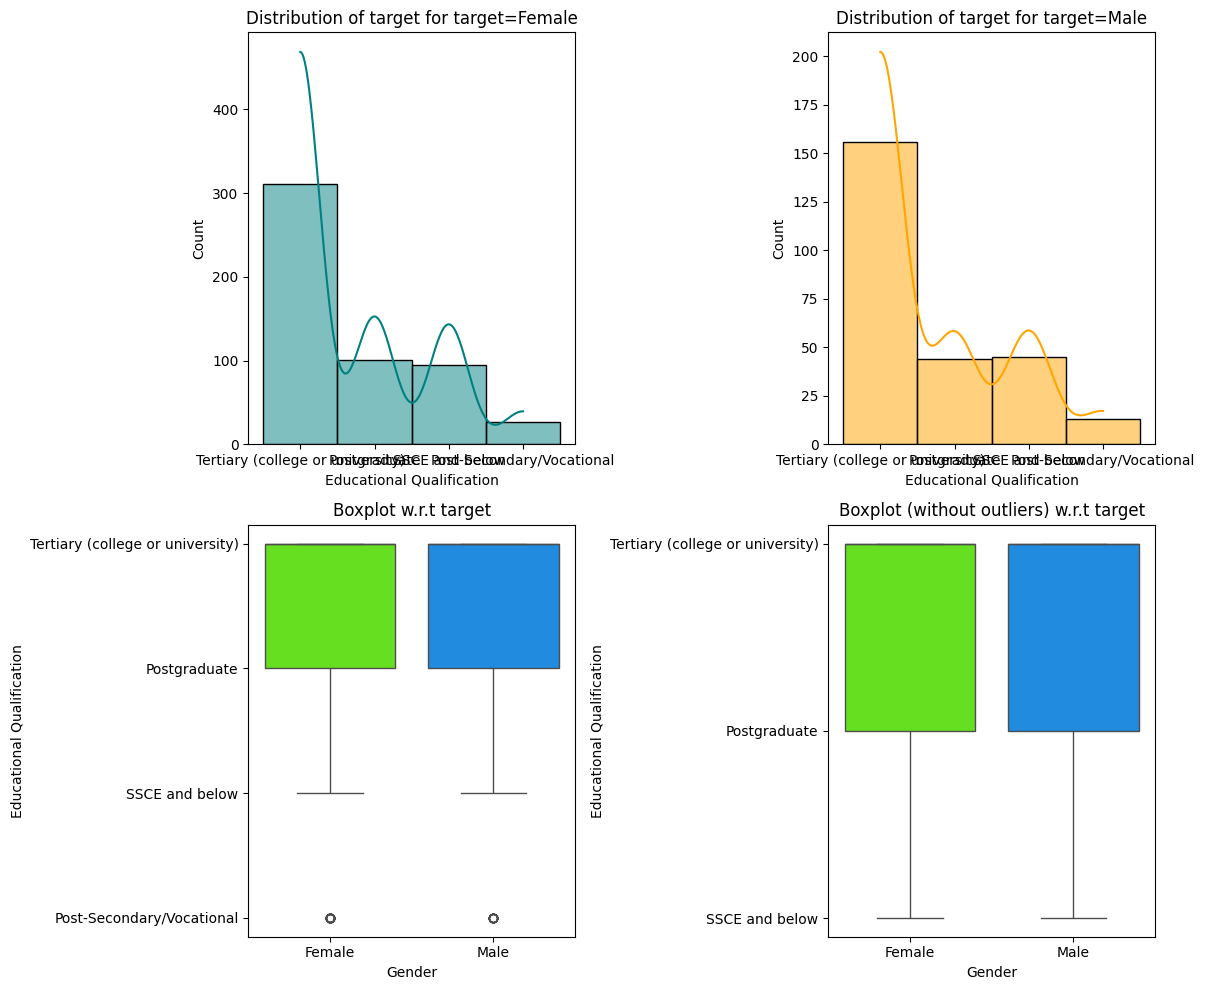

In [64]:
distribution_plot_wrt_target(data, "Educational Qualification", "Gender")

### Gender vs Do you have a permanent voters card?

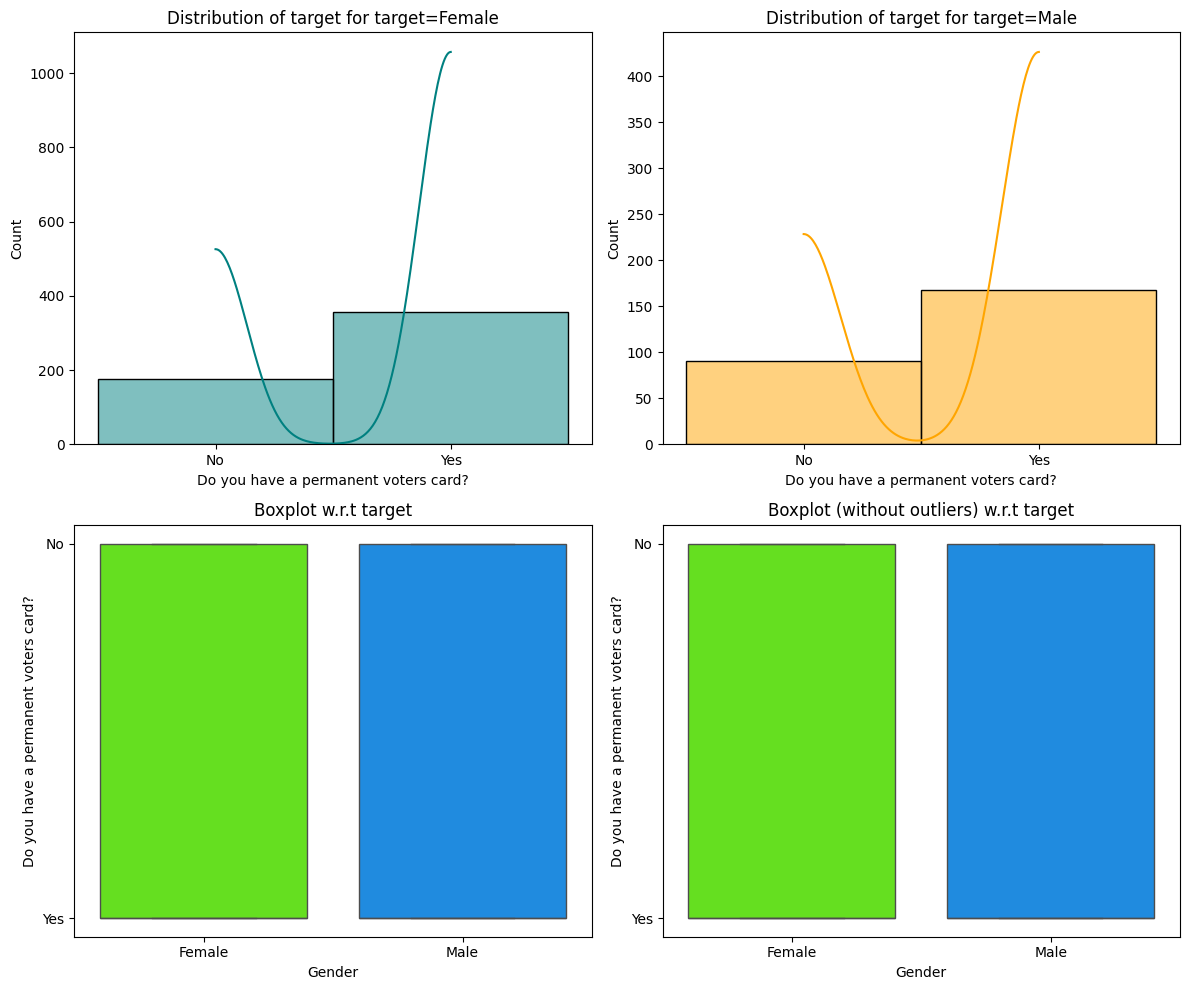

In [65]:
distribution_plot_wrt_target(data, "Do you have a permanent voters card?", "Gender")

### Gender vs Are you likely to vote when there is electoral violence around you?

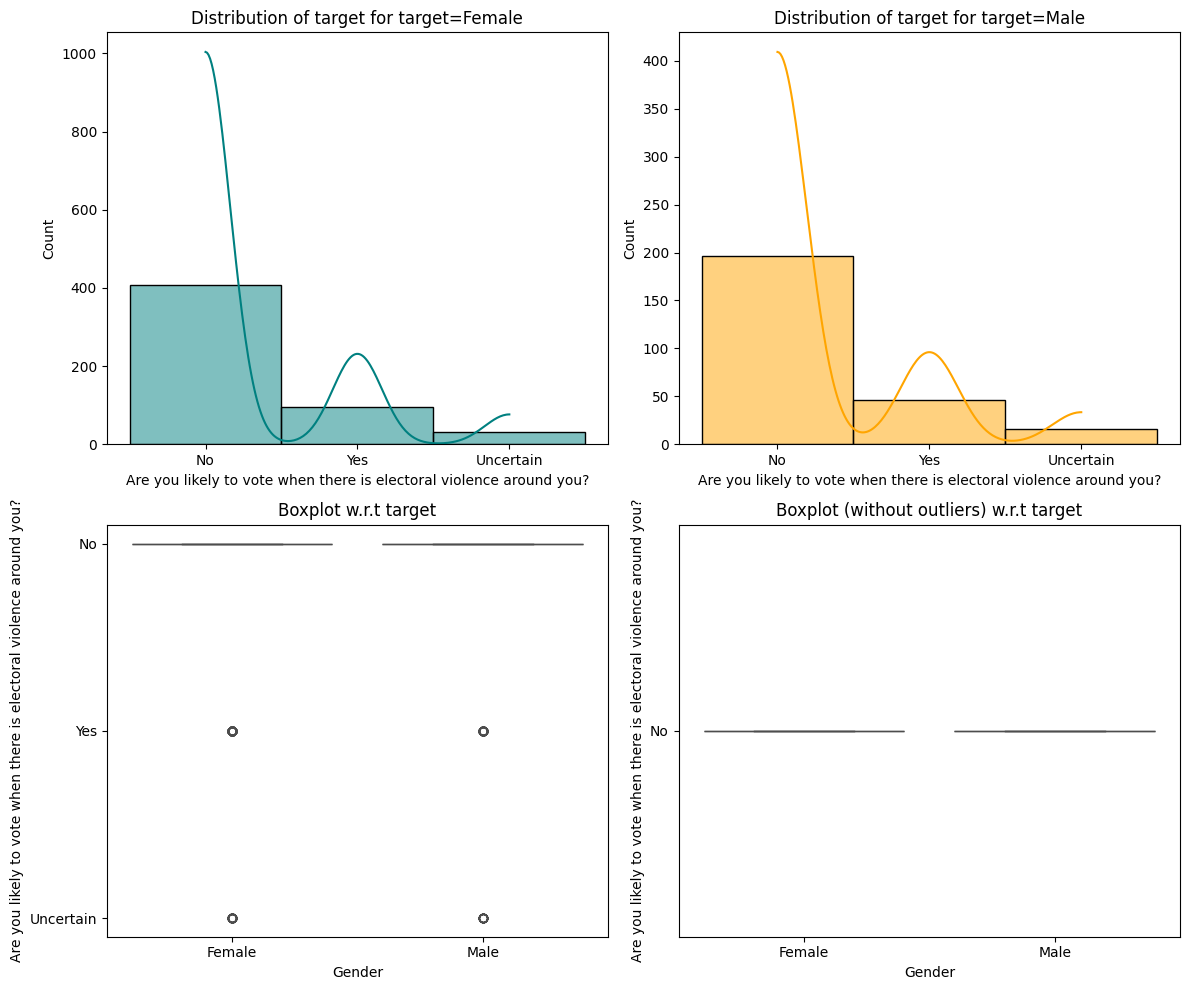

In [66]:
distribution_plot_wrt_target(data, "Are you likely to vote when there is electoral violence around you?", "Gender")

### Gender vs Are you likely to prevent a "female" loved one from going to vote after violence occurs?

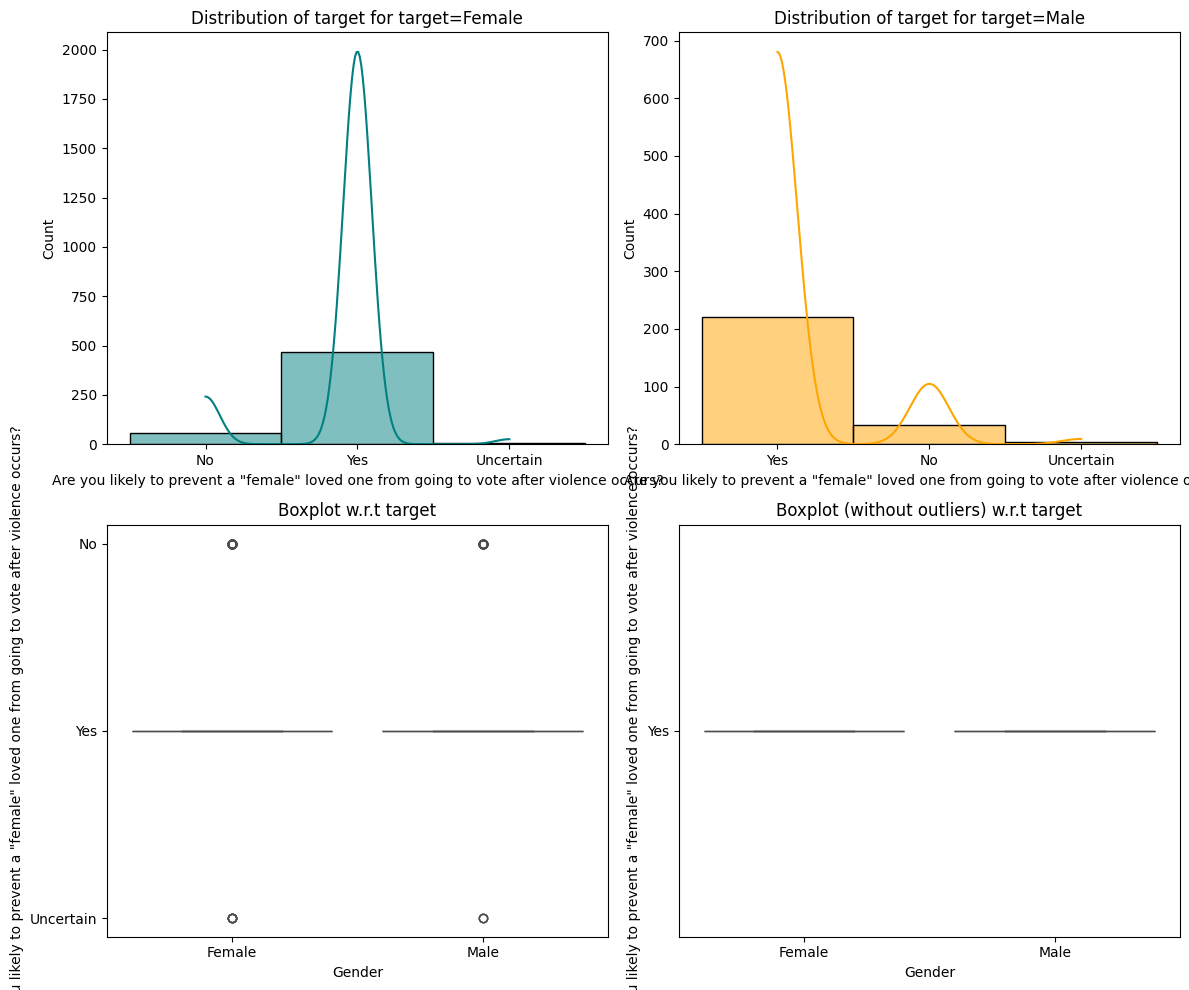

In [67]:
distribution_plot_wrt_target(data,  'Are you likely to prevent a "female" loved one from going to vote after violence occurs?', "Gender")

### Gender vs Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?

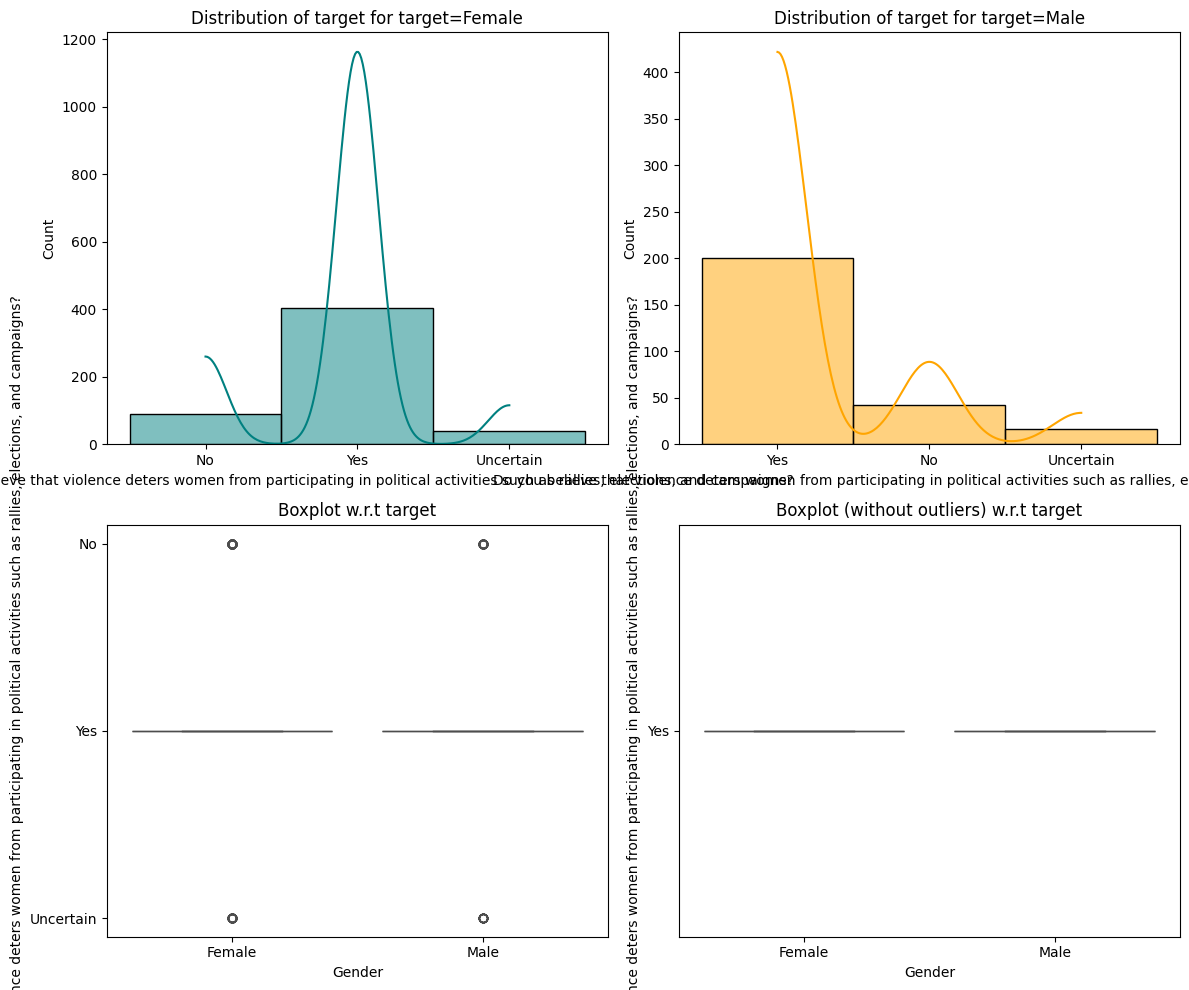

In [68]:
distribution_plot_wrt_target(data, "Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?", "Gender")

### Gender vs In your opinion, does violence impact the confidence of women in engaging in political activities?

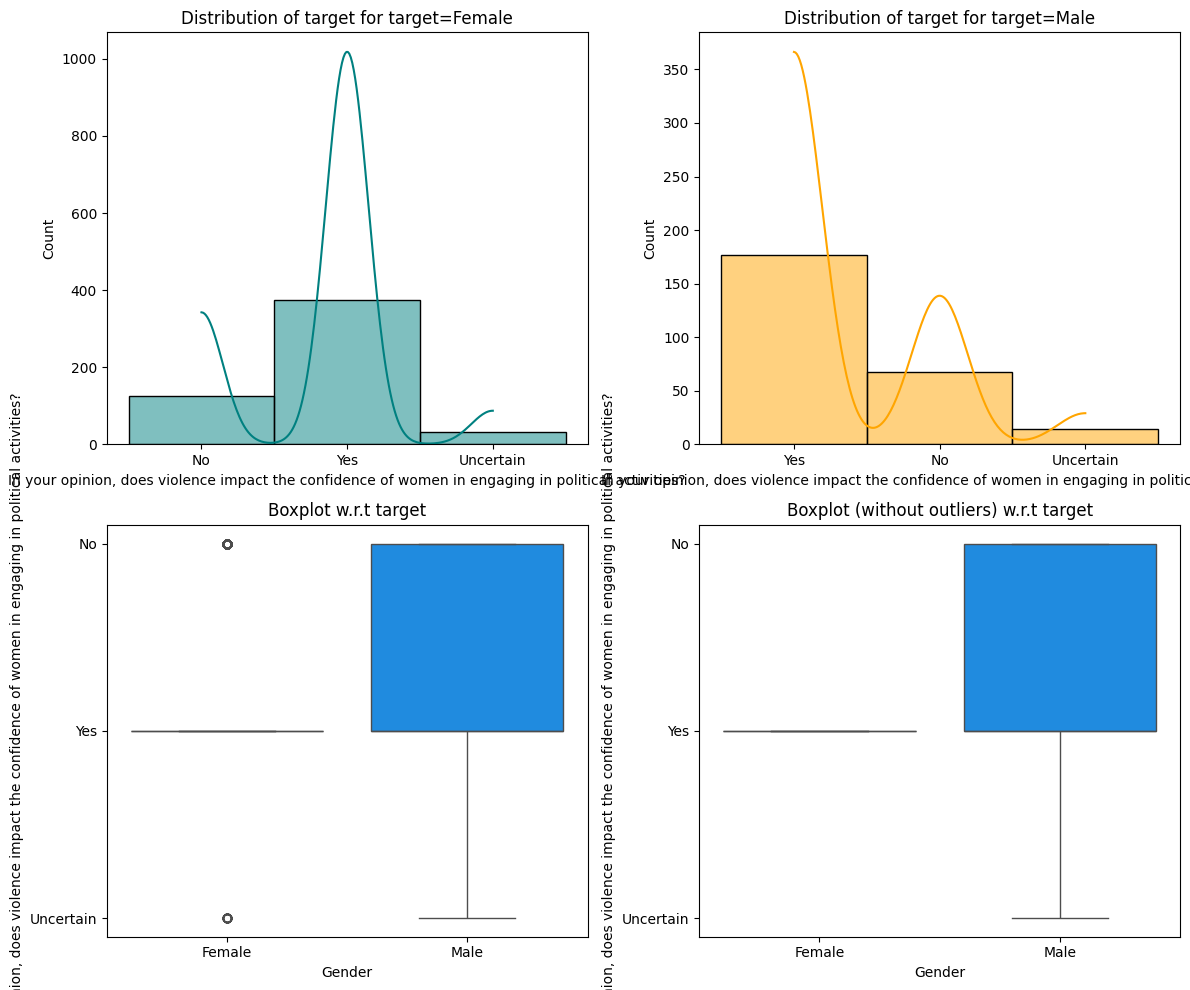

In [69]:
distribution_plot_wrt_target(data, "In your opinion, does violence impact the confidence of women in engaging in political activities?", "Gender")

### Gender vs Did you vote in 2023 General Elections?

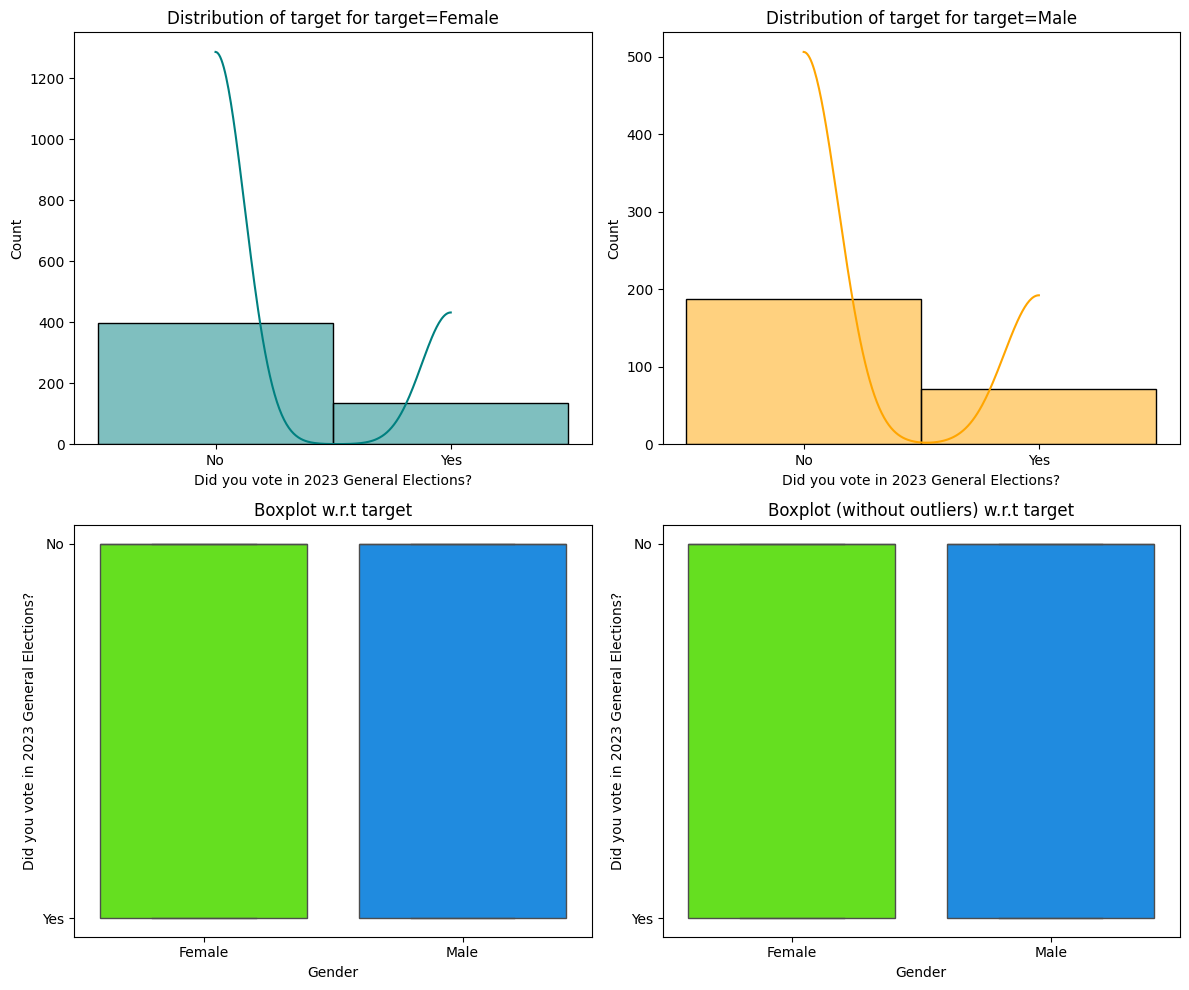

In [70]:
distribution_plot_wrt_target(data, "Did you vote in 2023 General Elections?", "Gender")

### Gender vs If No, why not?

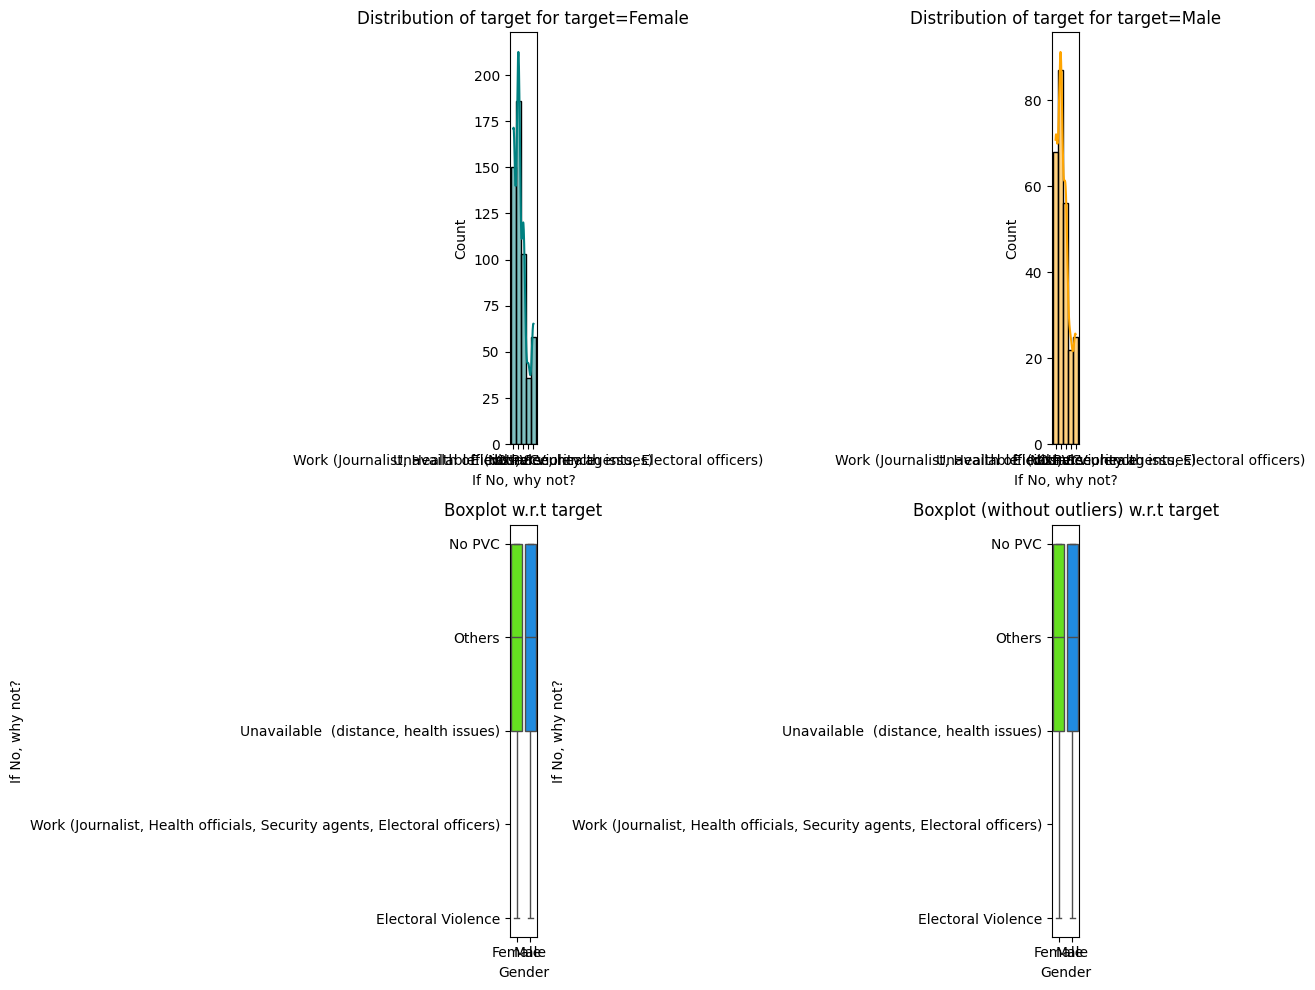

In [71]:
distribution_plot_wrt_target(data, "If No, why not?", "Gender")

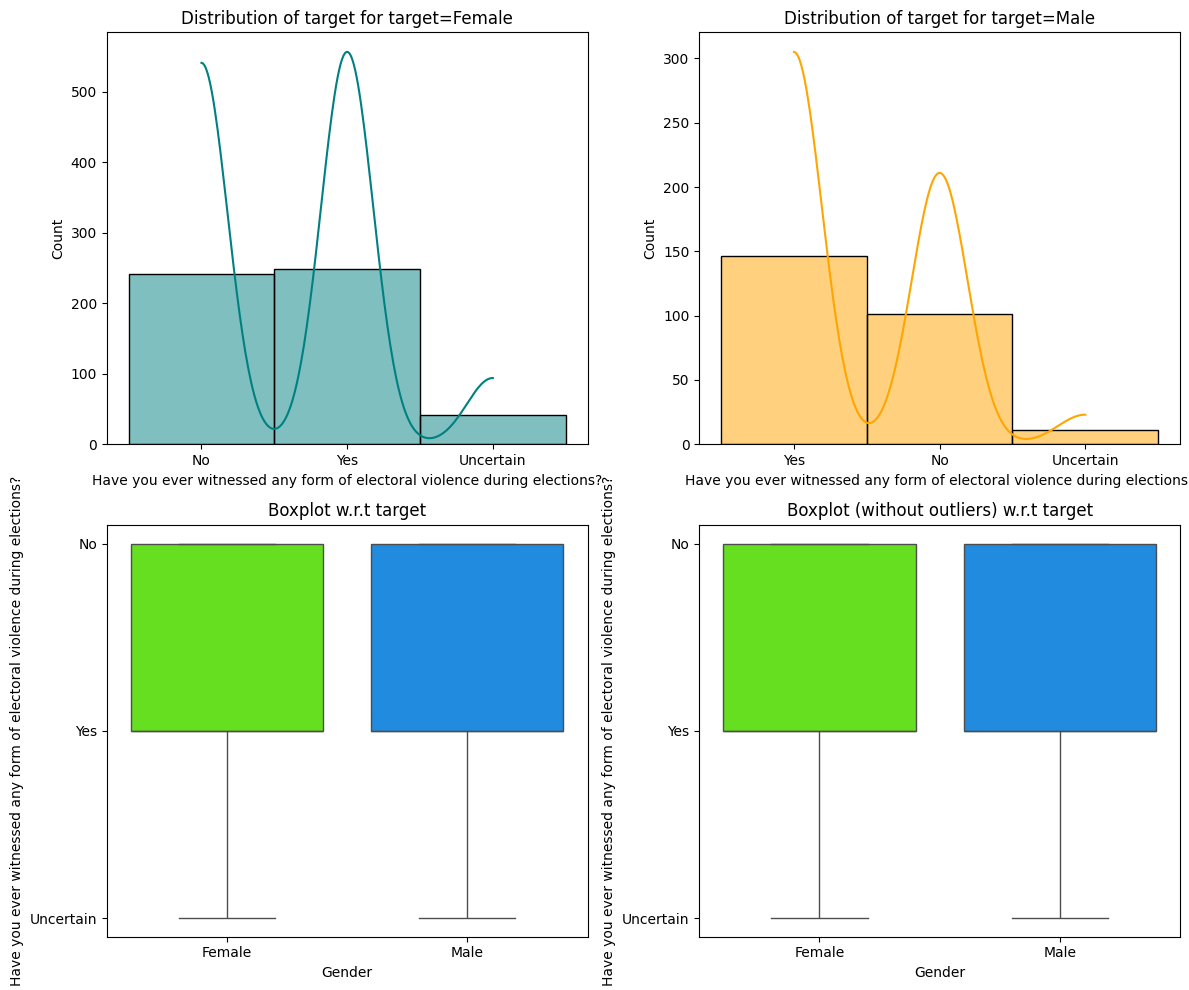

In [72]:
distribution_plot_wrt_target(data, "Have you ever witnessed any form of electoral violence during elections?", "Gender")

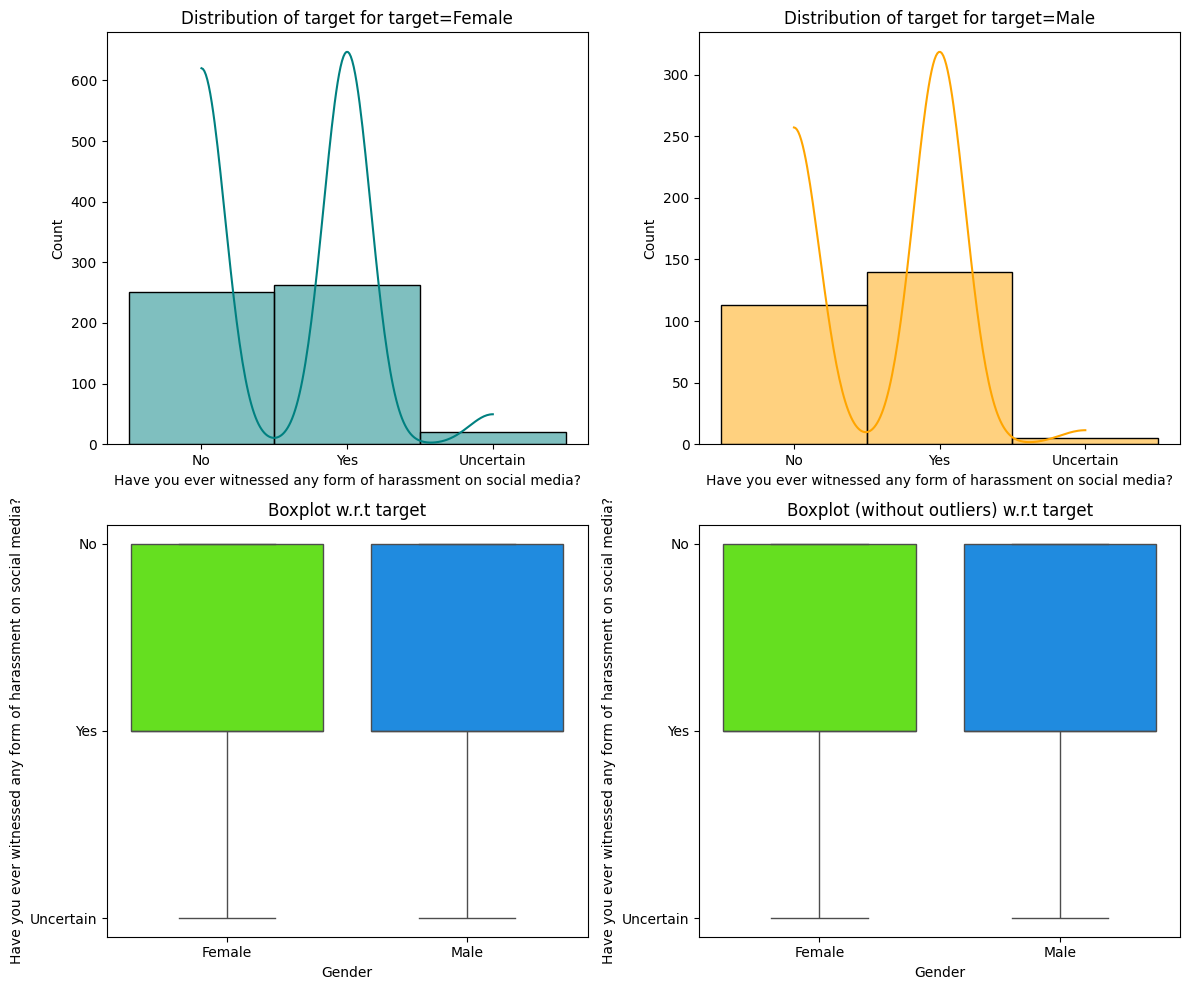

In [73]:
distribution_plot_wrt_target(data, "Have you ever witnessed any form of harassment on social media?", "Gender")

### Multivariant Analysis

In [74]:
def line_plot( cols):
    num_plots = len(cols)
    rows = (num_plots + 2) // 3  # Determine the number of rows needed
    
    plt.figure(figsize=(23, rows * 4))  # Adjust the figure size based on the number of rows
    
    for i, variable in enumerate(cols):
        plt.subplot(rows, 3, i + 1)
        
        # Count the occurrences of "Yes" and "No" for the given variable, grouped by Educational Qualification and Gender
        counts = data.groupby(['Educational Qualification', 'Gender', variable]).size().reset_index(name='Count')
#         counts = data.groupby(['Edu. Qlf.', 'Gender', variable]).size().reset_index(name='Count')
        
        # Plot the data with different markers for "Yes" and "No"
        sns.lineplot(data=counts, x="Educational Qualification", y='Count', hue="Gender", style=variable, markers=True, dashes=False)
        
        plt.ylabel(f"{variable}")  # Set y-axis label
        plt.title(variable)
        plt.tight_layout()
    
    plt.show()

In [75]:
dataCorr

Gender  Work Sector  Edu. Qlf.  Age range  PVC  Vote During Elec. Vio.  \
0         0            1         15       24.0    0                     0.0   
1         0            1         15       24.0    0                     0.0   
2         0            0         15       35.5    1                     0.0   
3         1            1         15       24.0    0                     0.0   
4         0            0         15       24.0    1                     0.0   
..      ...          ...        ...        ...  ...                     ...   
786       0            1          5       35.5    1                     0.0   
787       0            0         15       80.0    0                     0.0   
788       1            1         20       35.5    0                     0.5   
789       1            0         15       55.5    1                     0.0   
790       0            1         15       24.0    1                     1.0   

     Allow Female Vote During Elec. Vio.  Violence Deters Women From Parti.  \
0                                    0.0                                0.0   
1                                    1.0                                1.0   
2                                    1.0                                1.0   
3                                    1.0                                1.0   
4                                    1.0                                1.0   
..                                   ...                                ...   
786                                  1.0                                0.5   
787                                  1.0                                0.0   
788                                  1.0                                1.0   
789                                  1.0                                0.5   
790                                  1.0                                1.0   

     Violence Impact Women Confi. In Parti.  Vote in 2023 Gen. Elec.  \
0                                       0.0                        0   
1                                       1.0                        0   
2                                       1.0                        0   
3                                       1.0                        0   
4                                       1.0                        1   
..                                      ...                      ...   
786                                     1.0                        1   
787                                     0.0                        0   
788                                     1.0                        0   
789                                     0.5                        0   
790                                     1.0                        1   

     If No, why not?  Witnessed any Elec. Vio.  Witnessed Haras. Social Media  
0                0.0                       0.0                            0.0  
1                0.3                       1.0                            1.0  
2                0.5                       0.0                            0.0  
3                0.0                       1.0                            0.0  
4                0.3                       1.0                            1.0  
..               ...                       ...                            ...  
786              0.3                       0.5                            1.0  
787              0.5                       1.0                            0.0  
788              0.0                       1.0                            0.0  
789              0.3                       0.0                            0.0  
790              0.3                       1.0                            0.0  

[791 rows x 13 columns]

#### Gender vs Education Qualification vs Do you have a permanent voters card?

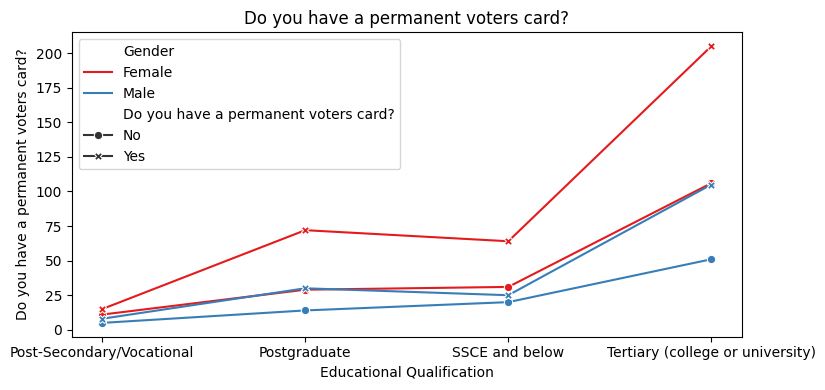

In [76]:
cols = data[
    ["Do you have a permanent voters card?"]
].columns.tolist()
line_plot(cols)

#### Gender vs Education Qualification vs Did you vote in 2023 General Elections?

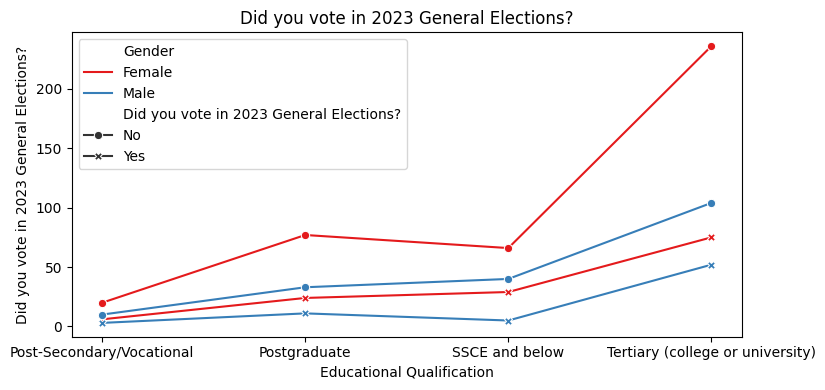

In [77]:
cols = data[
    ["Did you vote in 2023 General Elections?"]
].columns.tolist()
line_plot(cols)

**Observation**
* Majority lf the females that do not vote in the 2023 General Election have Tertiary Education Qualification
* Majority of the female that have PVC have Tertiary Education Qualification

#### Gender vs Education Qualification vs Are you likely to vote when there is electoral violence around you?

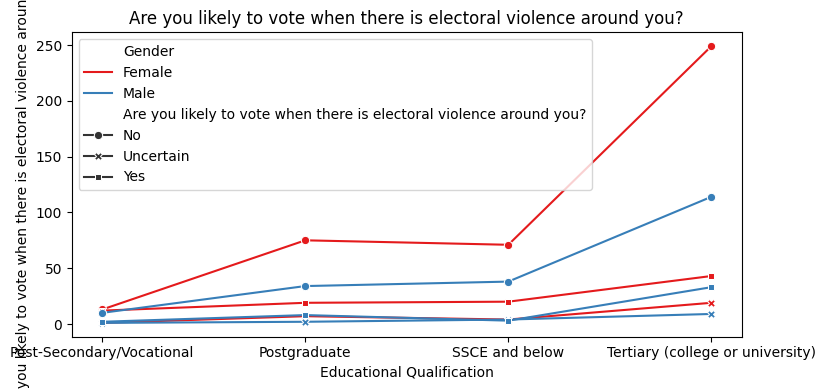

In [78]:
cols = data[
    ["Are you likely to vote when there is electoral violence around you?"]
].columns.tolist()
line_plot(cols)

#### Gender vs Education Qualification vs Are you likely to prevent a "female" loved one from going to vote after violence occurs?

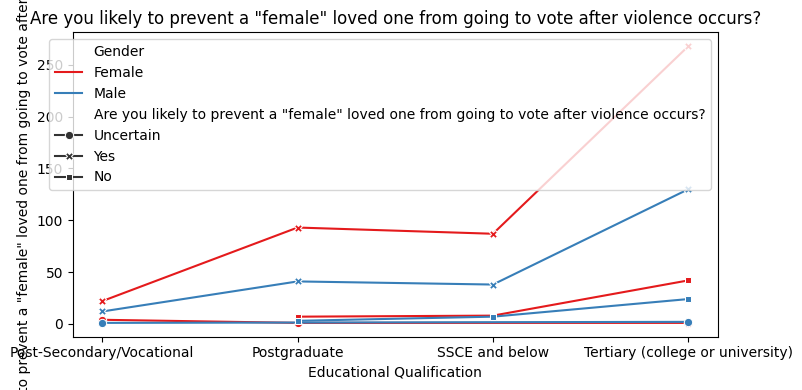

In [79]:
cols = data[
    ['Are you likely to prevent a "female" loved one from going to vote after violence occurs?']
].columns.tolist()
line_plot(cols)

**Observation**
* Majority of the females that their education level is Tertiary (college or university) indicate they are not likely to vote when there is electoral violence around them
* Although more male shows that are not likely to vote when there is electoral violence around them
* Females with Post-Secondary/Vocational qualification still show willingness to vote despicte electoral violence around them
* only Females with Post-Secondary/Vocational are uncertain to prevent a "female" loved one's from going to vote after violence occurs 

#### Gender vs Education Qualification vs Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?

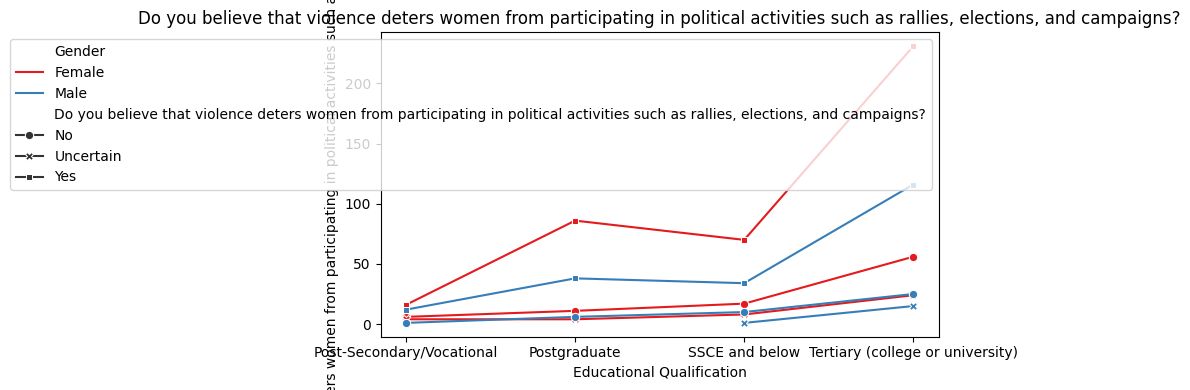

In [80]:
cols = data[
    ["Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?"
     ]
].columns.tolist()
line_plot(cols)

#### Gender vs Education Qualification vs In your opinion, does violence impact the confidence of women in engaging in political activities?

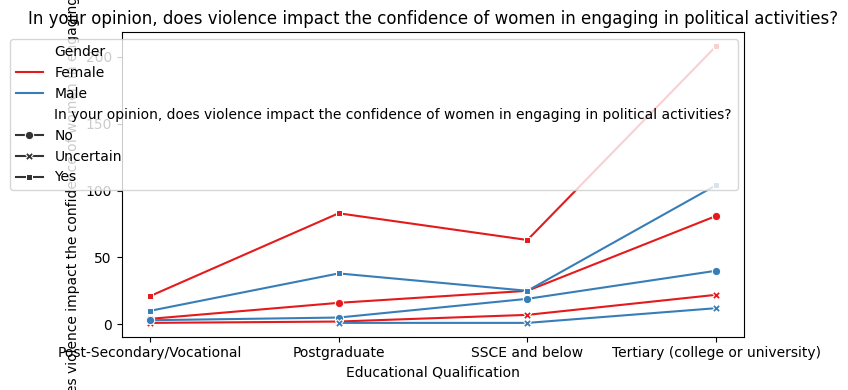

In [81]:
cols = data[
    ['In your opinion, does violence impact the confidence of women in engaging in political activities?']
].columns.tolist()
line_plot(cols)

**Observation**

* Male respondent who have Tertiary (college or university) qualification are **uncertain if** violence deters women from participating in pratical activities sucg as as rallies, elections, and campaigns

* Male respondent who have SSCE and Below claims that violence **does not** deters women from participating in pratical activities sucg as as rallies, elections, and campaigns

* All the female respondent, irrespective of their educational level claims that **agree** that violence deters women from participating in pratical activities sucg as as rallies, elections, and campaigns

#### Gender vs Education Qualification vs Have you ever witnessed any form of electoral violence during elections?

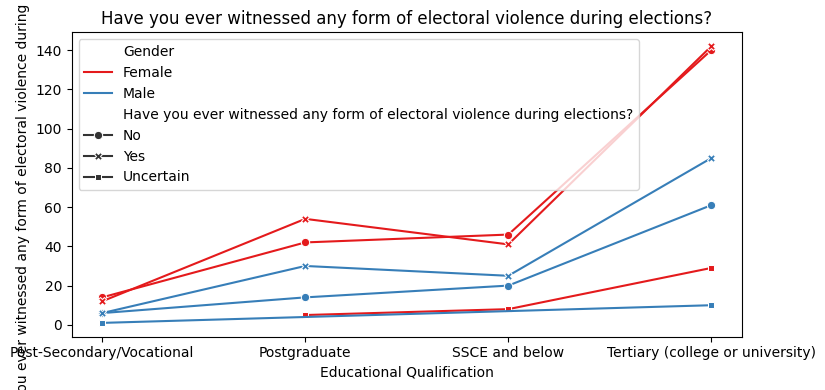

In [82]:
cols = data[
    ["Have you ever witnessed any form of electoral violence during elections?"]
].columns.tolist()
line_plot(cols)

#### Gender vs Education Qualification vs Have you ever witnessed any form of harassment on social media?

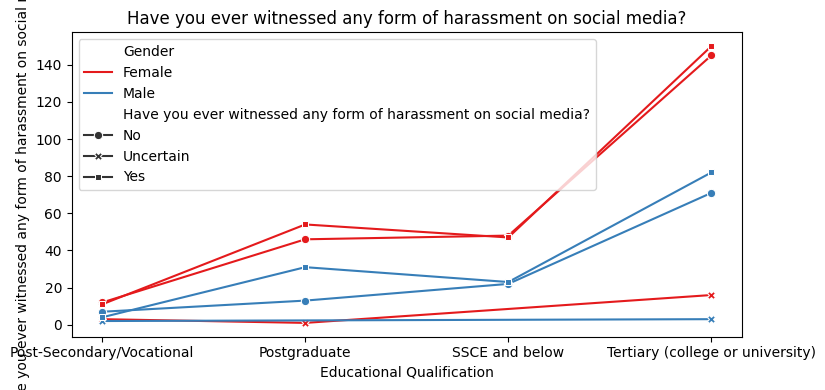

In [83]:
cols = data[
    ['Have you ever witnessed any form of harassment on social media?']
].columns.tolist()
line_plot(cols)

**Observation**
* Male respondent who have BTech and undergraduate are are the lowest among all the respondent that has ever witnessed any form of electoral violence during elections

* All the female respondent, irrespective of their educational level claims that **agree** that they have witnessed any form of electoral violence during elections with females with BTech beign the highest.

* Male respondent who have BTech and Mbbs in view are are the lowest among all the respondent that has ever witnessed any form of harrassment on social media

* All the female respondent, irrespective of their educational level claims that **agree** that they have witnessed any form of harrassment on social media with females with undergarduate beign the highest follow by Mbbsin view.

<a id='eda'></a>
### <a id='link'>Summary of EDA</a>

* The dataset has total of 533 Female and 258 Male respondent
* There are no missing values in the dataset
* High level of correlation exist between some of the variables.
* There are also outilers

**Data Cleaning**
* Timestamp column contains uniques ID for response. This column has been dropped. 
* The target varaible is encoded to numeric.


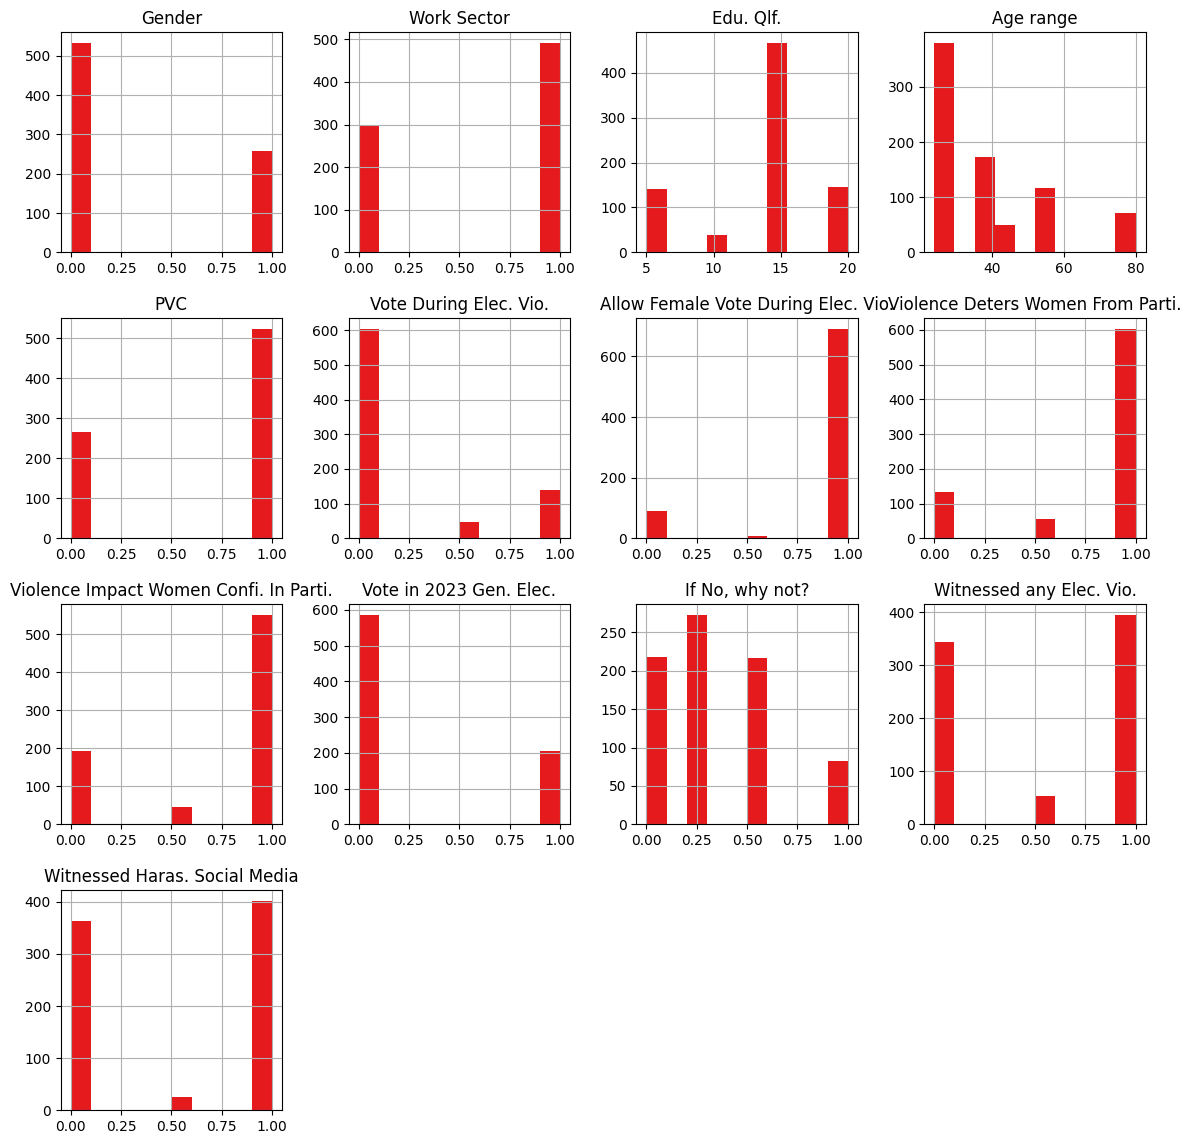

In [84]:
# creating histograms
dataCorr.hist(figsize=(14, 14))
plt.show()

### Let's find the percentage of outliers, in each column of the data, using IQR.

In [85]:
Q1 = dataCorr.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = dataCorr.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [86]:
lower

Gender                                    -1.50
Work Sector                               -1.50
Edu. Qlf.                                 15.00
Age range                                 -8.25
PVC                                       -1.50
Vote During Elec. Vio.                     0.00
Allow Female Vote During Elec. Vio.        1.00
Violence Deters Women From Parti.          1.00
Violence Impact Women Confi. In Parti.    -0.25
Vote in 2023 Gen. Elec.                   -1.50
If No, why not?                           -0.75
Witnessed any Elec. Vio.                  -1.50
Witnessed Haras. Social Media             -1.50
dtype: float64

In [87]:
upper

Gender                                     2.50
Work Sector                                2.50
Edu. Qlf.                                 15.00
Age range                                 77.75
PVC                                        2.50
Vote During Elec. Vio.                     0.00
Allow Female Vote During Elec. Vio.        1.00
Violence Deters Women From Parti.          1.00
Violence Impact Women Confi. In Parti.     1.75
Vote in 2023 Gen. Elec.                    2.50
If No, why not?                            1.25
Witnessed any Elec. Vio.                   2.50
Witnessed Haras. Social Media              2.50
dtype: float64

In [88]:
(
    (dataCorr.select_dtypes(include=["float64", "int64"]) < lower)
    | (dataCorr.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Gender                                     0.000000
Work Sector                                0.000000
Edu. Qlf.                                 40.960809
Age range                                  8.975980
PVC                                        0.000000
Vote During Elec. Vio.                    23.640961
Allow Female Vote During Elec. Vio.       12.642225
Violence Deters Women From Parti.         23.767383
Violence Impact Women Confi. In Parti.     0.000000
Vote in 2023 Gen. Elec.                    0.000000
If No, why not?                            0.000000
Witnessed any Elec. Vio.                   0.000000
Witnessed Haras. Social Media              0.000000
dtype: float64

**Observation**
* After identifying outliers, we can decide whether to remove/treat them or not. It depends on one's approach, here we are not going to treat them as there will be outliers in real case scenario (in Education qualification, Vote During Elec. Vio., Allow Female Vote During Elec. Vio., etc) and we would want our model to learn the underlying pattern for such customers.

In [89]:
data1=[]
data1 = dataCorr.copy()

In [90]:
imputer = SimpleImputer(strategy="most_frequent")

In [91]:
X = data1.drop([ 'Allow Female Vote During Elec. Vio.'], axis=1)
y = data1[ 'Allow Female Vote During Elec. Vio.']

In [92]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [93]:
reqd_col_for_impute = ["Edu. Qlf.", "Gender", "Vote During Elec. Vio."]

# reqd_col_for_impute = ["Educational Qualification", "Gender", "Are you likely to vote when there is electoral violence around you?"]

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.
- Accuracy
- Precision
- Recall
- F1-Score
- ROC-Curve

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

## Model with original data

In [94]:
# Define bin edges based on the known ranges for the relevant classes
bins = np.linspace(0, 1, 3)  # Adjust based on your data
y_train_binned = np.digitize(y_train, bins) - 1
y_test_binned = np.digitize(y_test, bins) - 1

# Reassign your labels
y_train = y_train_binned.copy()
y_test = y_test_binned.copy()


In [95]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=1)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predictions on the training data
y_pred_rf_train = rf_model.predict(X_train)

# Calculate training performance
rf_train_accuracy = accuracy_score(y_train, y_pred_rf_train)
rf_train_recall = recall_score(y_train, y_pred_rf_train, average='weighted')

# Print training performance metrics
print("Training Performance of Random Forest Model:")
print(f"Random Forest Training Accuracy: {rf_train_accuracy:.3f}")
print(f"Random Forest Training Recall: {rf_train_recall:.3f}")


Training Performance of Random Forest Model:
Random Forest Training Accuracy: 0.988
Random Forest Training Recall: 0.988


In [96]:
# Cross-validated metrics
cv_scores_accuracy = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy')
cv_scores_recall = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='recall_weighted')
cv_scores_precision = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='precision_weighted')
cv_scores_f1 = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='f1_weighted')
cv_scores_roc_auc = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='roc_auc')
cv_scores_log_loss = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='neg_log_loss')

# Average metrics
average_cv_accuracy = cv_scores_accuracy.mean()
average_cv_recall = cv_scores_recall.mean()
average_cv_precision = cv_scores_precision.mean()
average_cv_f1 = cv_scores_f1.mean()
average_cv_roc_auc = cv_scores_roc_auc.mean()
average_cv_log_loss = -cv_scores_log_loss.mean()  # Negate to get positive log loss

# Print results
print("10-fold Cross validation Training Performance of Random Forest Model:")
print(f"Average CV Accuracy: {average_cv_accuracy:.3f}")
print(f"Average CV Recall: {average_cv_recall:.3f}")
print(f"Average CV Precision: {average_cv_precision:.3f}")
print(f"Average CV F1 Score: {average_cv_f1:.3f}")
# print(f"Average CV ROC AUC: {average_cv_roc_auc:.3f}")
# print(f"Average CV Log Loss: {average_cv_log_loss:.3f}")


10-fold Cross validation Training Performance of Random Forest Model:
Average CV Accuracy: 0.961
Average CV Recall: 0.961
Average CV Precision: 0.961
Average CV F1 Score: 0.960


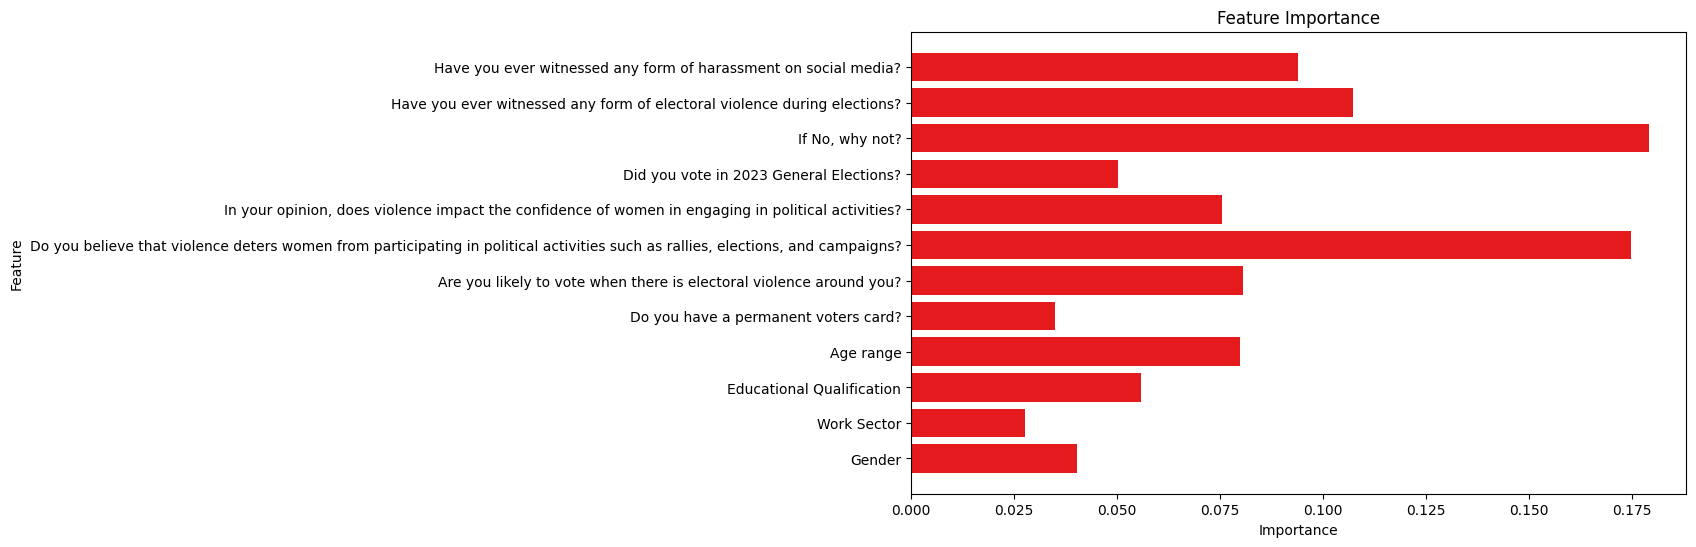

In [97]:
# Extract feature importances
importances = rf_model.feature_importances_

# Use the columns from X_train as feature names, then map them to the original column names from `data`
short_to_full_names = {
    'Gender': 'Gender',
    'Work Sector': 'Work Sector',
    'Edu. Qlf.': 'Educational Qualification',
    'Age range': 'Age range',
    'PVC': 'Do you have a permanent voters card?',
    'Vote During Elec. Vio.': 'Are you likely to vote when there is electoral violence around you?',
    'Violence Deters Women From Parti.': 'Do you believe that violence deters women from participating in political activities such as rallies, elections, and campaigns?',
    'Violence Impact Women Confi. In Parti.': 'In your opinion, does violence impact the confidence of women in engaging in political activities?',
    'Vote in 2023 Gen. Elec.': 'Did you vote in 2023 General Elections?',
    'If No, why not?': 'If No, why not?',
    'Witnessed any Elec. Vio.': 'Have you ever witnessed any form of electoral violence during elections?',
    'Witnessed Haras. Social Media': 'Have you ever witnessed any form of harassment on social media?'
}

# Match the names in X_train with the full column names from data
feature_names_full = [short_to_full_names[name] for name in X_train.columns]


# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names_full, importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### Performance Analysis on test data

- RandomForest classification model for predicting participation of Female in Election process


In [98]:

# Predict on the test dataset
y_pred_test = rf_model.predict(X_test)

# Ensure predictions are integers (within the expected range)
y_pred_test = np.clip(y_pred_test, 0, 3)  # Adjust this according to your binning

# Calculate evaluation metrics for the test set
test_accuracy = accuracy_score(y_test_binned, y_pred_test)
test_recall = recall_score(y_test_binned, y_pred_test, average='weighted')
test_precision = precision_score(y_test_binned, y_pred_test, average='weighted')
test_f1 = f1_score(y_test_binned, y_pred_test, average='weighted')

print("\nTest Performance Value:")
print(f"Random Forest Test Accuracy: {test_accuracy:.3f}")
print(f"Random Forest Test Recall: {test_recall:.3f}")
print(f"Random Forest Test Precision: {test_precision:.3f}")
print(f"Random Forest Test F1 Score: {test_f1:.3f}")

# Generate a classification report
report = classification_report(y_test, y_pred_test , target_names=['Class 0', 'Class 1', 'Class 2'], output_dict=False)

# Print the report
print("\n\n Random Forest Performance Report:")
print(report)



Test Performance Value:
Random Forest Test Accuracy: 0.944
Random Forest Test Recall: 0.944
Random Forest Test Precision: 0.946
Random Forest Test F1 Score: 0.945


 Random Forest Performance Report:
              precision    recall  f1-score   support

     Class 0       0.71      0.75      0.73        20
     Class 1       1.00      1.00      1.00         4
     Class 2       0.97      0.97      0.97       174

    accuracy                           0.94       198
   macro avg       0.90      0.91      0.90       198
weighted avg       0.95      0.94      0.95       198



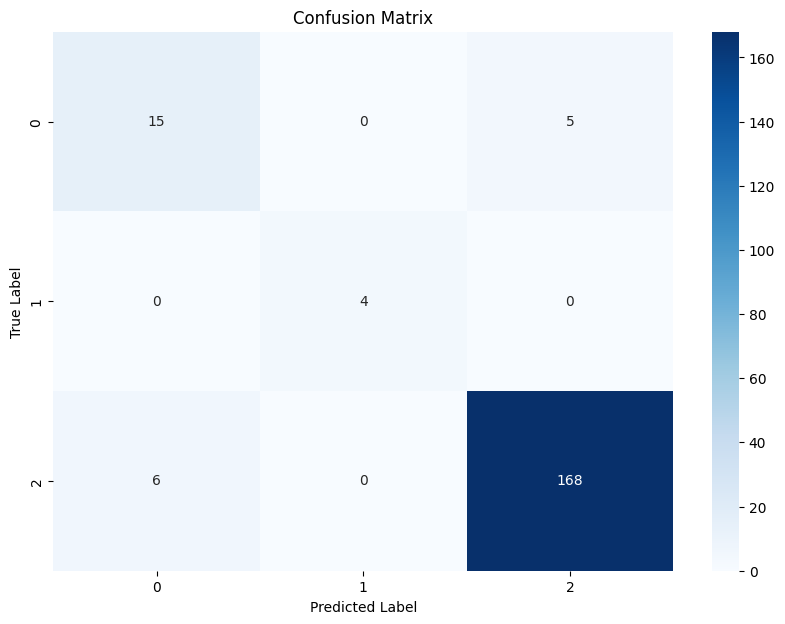

In [99]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test_binned, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_binned), yticklabels=np.unique(y_test_binned))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


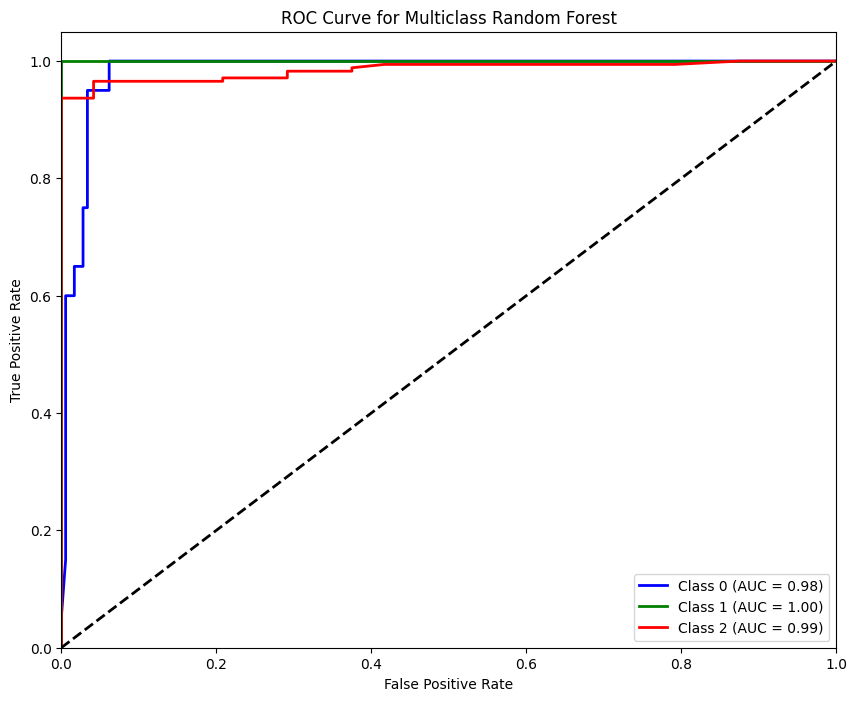

In [100]:

# Convert labels to binary format
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust the classes accordingly (for 3 classes)
n_classes = y_test_bin.shape[1]


# Predict probabilities for each class
y_score = rf_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves for each class
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'green', 'red'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Random Forest')
plt.legend(loc="lower right")
plt.show()


**DESCRIPTION OF THE WORK SO FAR**

* **STEP 1:** EXPLORATORY DATA ANALYSIS (EDA)
    - the EDA analysis provide proper understanding of the data
    - show existence of outliers
    
* **STEP 2:** SPLITING OF DATA
    - Split data into Train and Test Set
    
* **STEP 3:** APPLY MINMAX
    - Apply MinMax Scaler on Train Set
    - Apply MinMax Scaler on Test Set
    
* **STEP 4:** TRAIN MODEL
    - Train the RandomForest Model on the Train Set
    
* **STEP 5:** EVALUATE
    - Evaluate the Model performance on the Test Set
    - metric include Accuracy, Recall, F1-score, Precision and ROC Curve
    - the model recorded the following performance
        1. **Accuracy of 94.4%**, 
        2. **F1-score of 94.5%**, 
        3. **Recall of 94.4%** and 
        4. **Precision 94.6%** 
